# **Students Dropout Prediction**

#### **Explainable Artificial Intelligence**
**Advanced Topics in Machine Learning** - *Master Degree in Artificial Intelligence*

Project developed by:
- Guilherme Oliveira 
- Ricardo Costa
- Sara Táboas 

### **Table of Contents**
1. [Project Overview](#project-overview)
2. [Pre-Modelling Explanations](#pre-modelling-explanations)

    - [Exploratory Data Analysis](#eda)
        - [Dataset Overview and Quality Assessment](#dataset-overview)
        - [Feature Assessment and Visualization](#feature-assessment-and-visualization)
    
    - [Data Summarization and Reduction](#data-summarization-and-reduction)


3. [In-Modelling Explanations](#in-modelling-explanations)

    - [Decision Tree Classifier](#decision-tree-classifier)
    - [Explainable Boosting Machine](#explainable-boosting-machine)
    
4. [Post-Modelling Explanations](#post-modelling-explanations)

    - [Black Box Model Training](#black-box-training)

1000. [References](#references)

In [1]:
import sys
import os
sys.path.append(os.path.abspath("src"))

<a id="project-overview"></a>
### **Project Overview**


<span style="color:red">This project aims ...</span>



We considered for this project the *Students’ Dropout and Academic Success Dataset* from the UCI Machine Learning Repository [1](#ref-dataset).


<a id="pre-modelling-explanations"></a>
### **Pre-Modelling Explanations**


In [2]:
from utils.pre_modelling_utils import *

<a id="eda"></a>
#### **Exploratory Data Analysis**


<span style="color:red">Exploratory Data Analysis ........</span>

- **Dataset Overview and Quality Assessment**: 
    - *What are we working with?* Characterization of data, relatively to the number of observations, number and types of features, overall missing rate and percentage of duplicate observations.

    - *What type of errors are we working with?* Deeply understand and mitigate any existing errors to improve the future Machine Learning approach.

- **Feature Assessment and Visualization**: 
    - *How to understand the features and its relations?* Understanding of the dataset features' individual properties - *Univariate Analysis* - as well as their interactions and relationships - *Multivariate Analysis*


<a id="dataset-overview"></a>
1. ***Dataset Overview and Quality Assessment*** 

In [3]:
df = pd.read_csv('data.csv', sep=';')  # Load your dataset here
df.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [4]:
# Dataset overview
print("Number of observations:", df.shape[0])
print("Number of features:", df.shape[1])

# Data Quality: missing/duplicated data
print("Number of duplicate rows:", df.duplicated().sum())
info = pd.DataFrame({
    "Column": df.columns,
    "Missing Count": df.isnull().sum().values,
    "Dtype": df.dtypes.astype(str).values
})
info

Number of observations: 4424
Number of features: 37
Number of duplicate rows: 0


Column  Missing Count    Dtype
0                                   Marital status              0    int64
1                                 Application mode              0    int64
2                                Application order              0    int64
3                                           Course              0    int64
4                     Daytime/evening attendance\t              0    int64
5                           Previous qualification              0    int64
6                   Previous qualification (grade)              0  float64
7                                      Nacionality              0    int64
8                           Mother's qualification              0    int64
9                           Father's qualification              0    int64
10                             Mother's occupation              0    int64
11                             Father's occupation              0    int64
12                                 Admission grade              0  float64
13                                       Displaced              0    int64
14                       Educational special needs              0    int64
15                                          Debtor              0    int64
16                         Tuition fees up to date              0    int64
17                                          Gender              0    int64
18                              Scholarship holder              0    int64
19                               Age at enrollment              0    int64
20                                   International              0    int64
21             Curricular units 1st sem (credited)              0    int64
22             Curricular units 1st sem (enrolled)              0    int64
23          Curricular units 1st sem (evaluations)              0    int64
24             Curricular units 1st sem (approved)              0    int64
25                Curricular units 1st sem (grade)              0  float64
26  Curricular units 1st sem (without evaluations)              0    int64
27             Curricular units 2nd sem (credited)              0    int64
28             Curricular units 2nd sem (enrolled)              0    int64
29          Curricular units 2nd sem (evaluations)              0    int64
30             Curricular units 2nd sem (approved)              0    int64
31                Curricular units 2nd sem (grade)              0  float64
32  Curricular units 2nd sem (without evaluations)              0    int64
33                               Unemployment rate              0  float64
34                                  Inflation rate              0  float64
35                                             GDP              0  float64
36                                          Target              0   object

Target variable distribution:
 Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


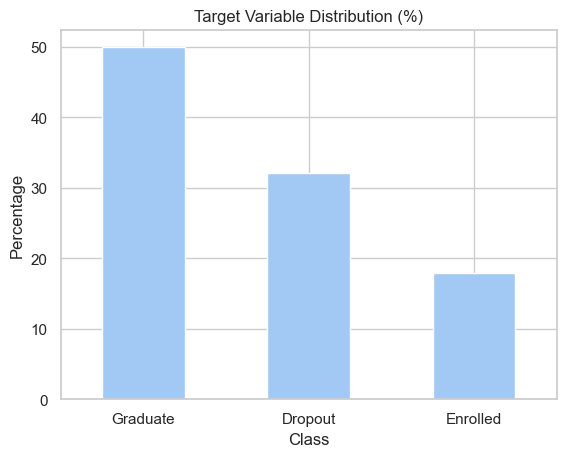

In [5]:
# Imbalance in target variable
target_counts = df['Target'].value_counts()
print("Target variable distribution:\n", target_counts)
plot_target_distribution(df)

As the goal of our project is to predict and to explain Student's Dropout, we decided to continue without observations classified as 'Enrolled'.

In [6]:
# Drop observations classified as 'Enrolled'
df = df[df['Target'] != 'Enrolled']
df

Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                                1                       1   
2                                1                       1   
3                                1                       1   
4                                0                       1   
...                            ...                     ...   
4419                             1                       1   
4420                             1                       1   
4421                             1                       1   
4422                             1                       1   
4423                             1                       1   

      Previous qualification (grade)  Nacionality  Mother's qualification  \
0                              122.0            1                      19   
1                              160.0            1                       1   
2                              122.0            1                      37   
3                              122.0            1                      38   
4                              100.0            1                      37   
...                              ...          ...                     ...   
4419                           125.0            1                       1   
4420                           120.0          105                       1   
4421                           154.0            1                      37   
4422                           180.0            1                      37   
4423                           152.0           22                      38   

      Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                         12  ...                                    0   
1                          3  ...                                    0   
2                         37  ...                                    0   
3                         37  ...                                    0   
4                         38  ...                                    0   
...                      ...  ...                                  ...   
4419                       1  ...                                    0   
4420                       1  ...                                    0   
4421                      37  ...                                    0   
4422                      37  ...                                    0   
4423                      37  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
0                            

In [7]:
print("Number of observations after dropping 'Enrolled':", df.shape[0])

Number of observations after dropping 'Enrolled': 3630


<span style="color:red">**MAPPING TARGET VARIABLE**</span>


2. ***Feature Assessment and Visualization***

The dataset was collected to enable early identification of at-risk students, including information available at enrollment (e.g. academic background, demographics, socio-economic status) and academic performance after the 1st and 2nd semesters.

These features can be grouped into several categories:

- Demographic data;

- Socio-economic data;

- Macro-economic data;

- Academic data at enrollment;

- Academic data at the end of 1st semester;

- Academic data at the end of 2nd semester;

- Target;

These groups of features will later be used to help their analysis.
    

**Univariate Analysis**

Analysis the individual characteristics of each feature, to further help on decisions such as their relevance for the analysis itself and the type of data preparation required to achieve our project goals. 

- **Numerical Features:** most often comprise information regarding mean, standard deviation, skewness, and other quantile statistics, and are best represented using histogram plots

- **Categorical Features:** usually described using the mode and frequency tables, and represented using bar plots for category analysis.

**A) Demographic Data:**
- Marital Status
- Nationality
- Displaced
- Gender
- Age at enrollment
- International 

As mentioned before, we will treat Marital status, Nacionality, Displaced, Gender and International as categorical features. The remaining one, Age at enrollment will be treated as its data type (numerical)

In [8]:
demographic_features = ['Marital status', 'Nacionality', 'Displaced', 'Gender', 'Age at enrollment', 'International']

numerical_demographic = ["Age at enrollment"]
categorical_demographic = ["Marital status", "Nacionality", "Gender", "Displaced", "International"]

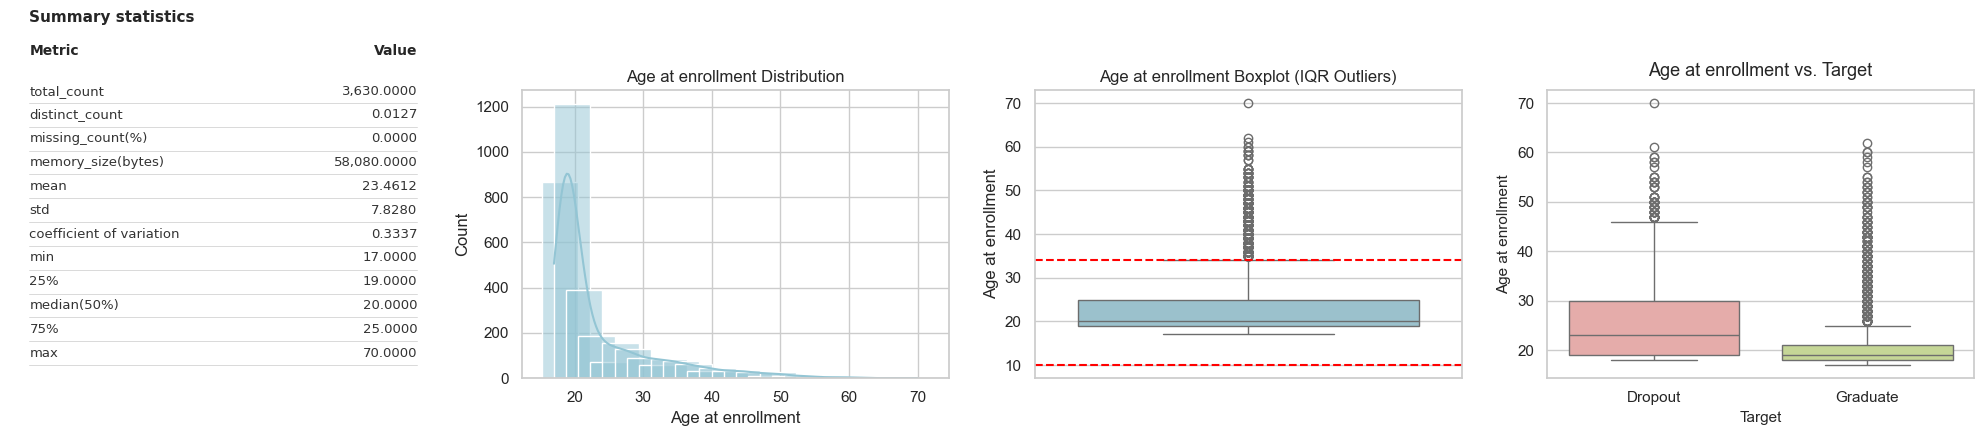

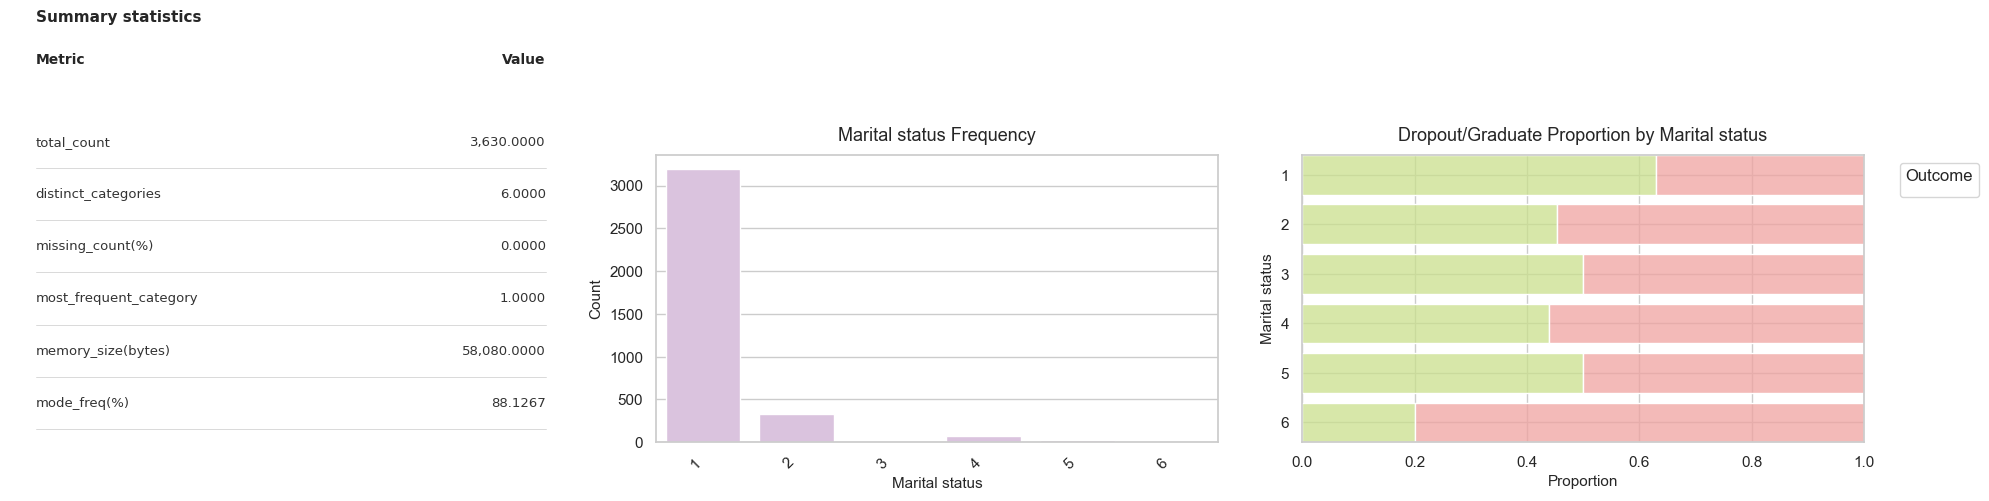

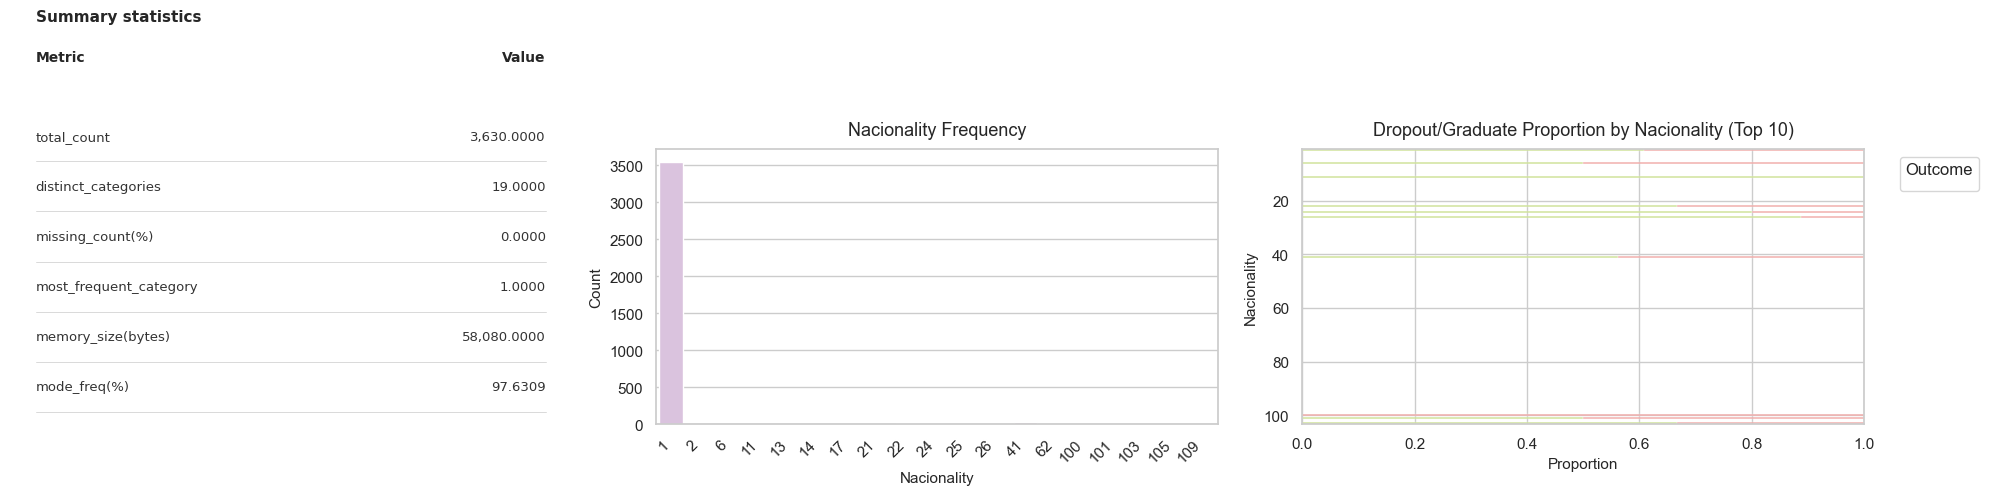

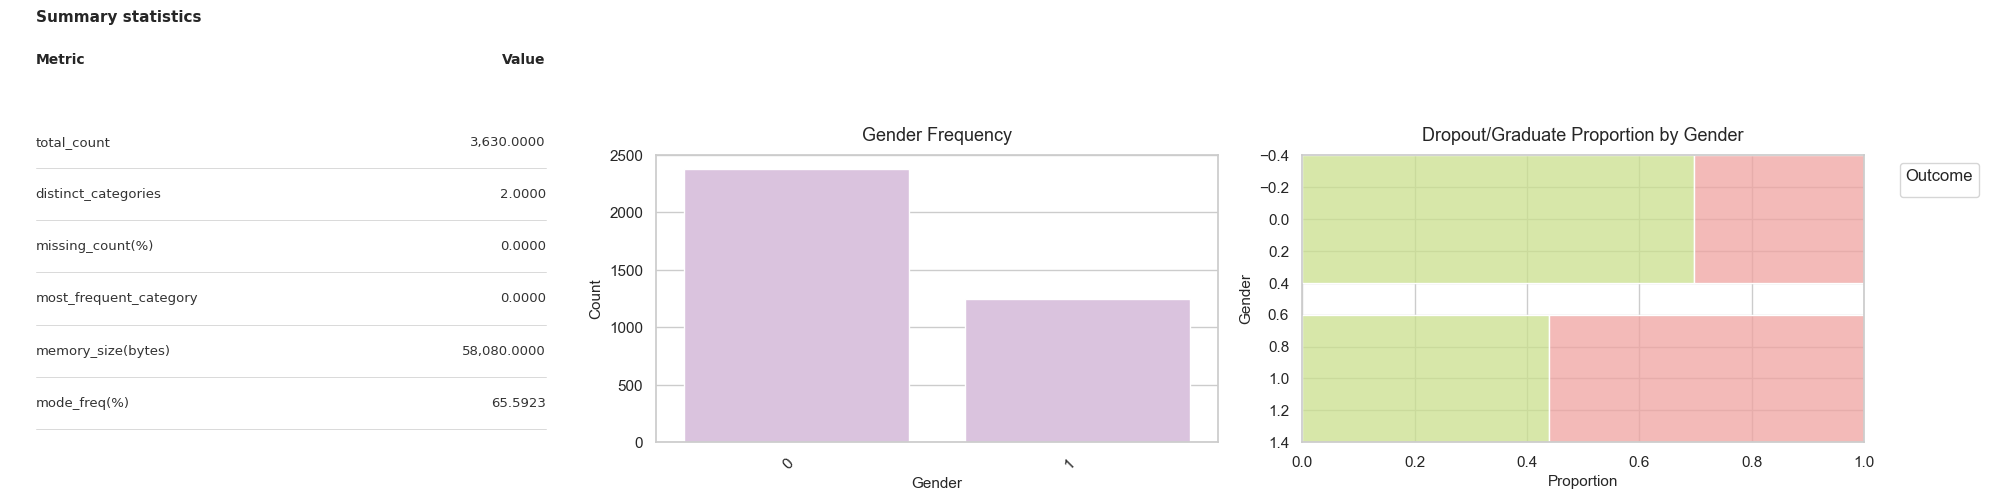

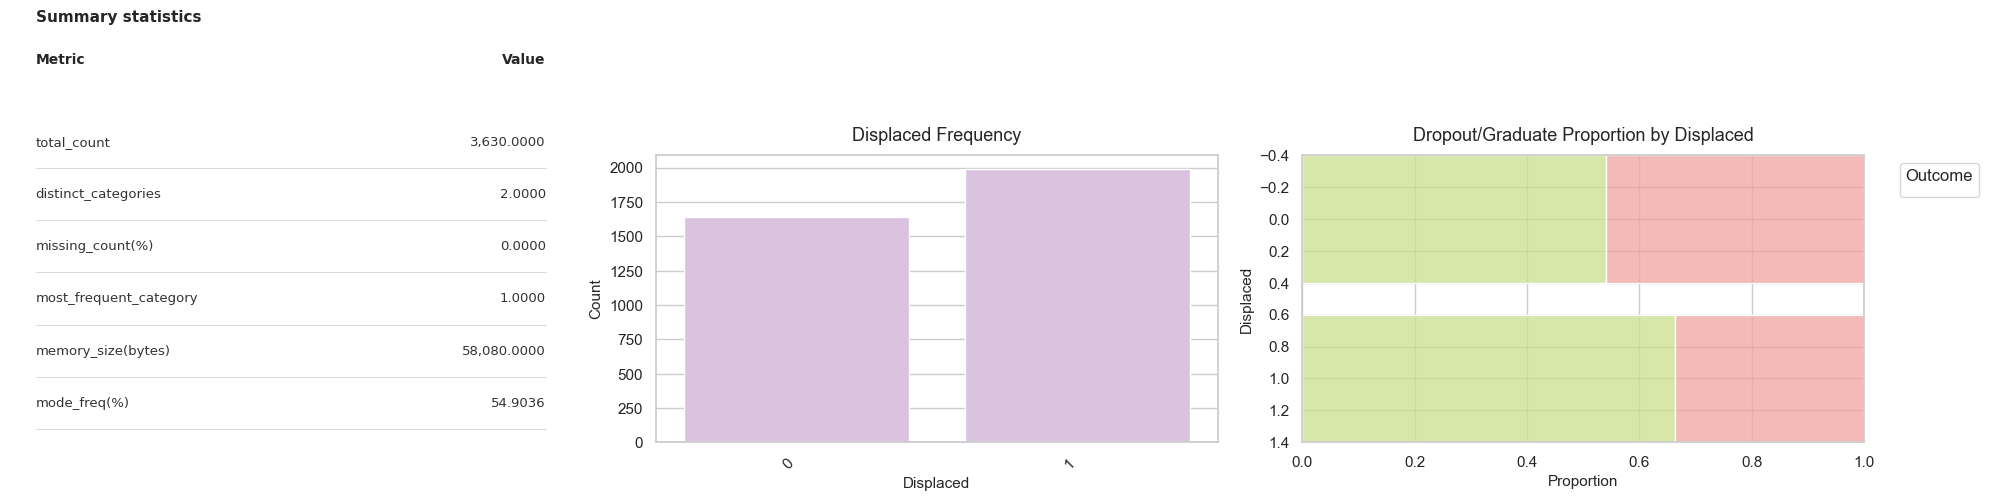

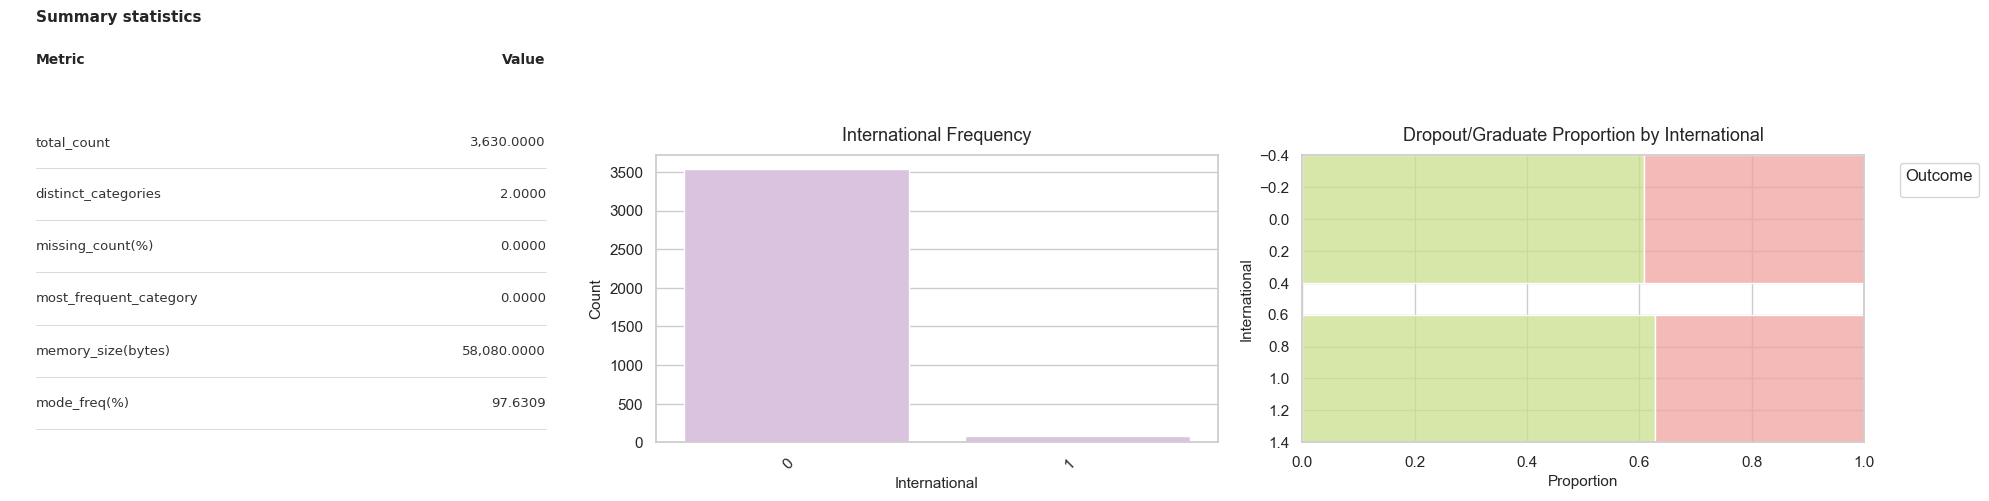

In [9]:
visualize_features_cards(df, numerical_demographic, categorical_demographic, target_col='Target')

**Age at enrollment**

- Strong right skew — most students are around 18–20, with a long tail up to age 70.
- Atypical older students are present in small numbers.

Older students may face more dropout risk. We might consider futuruly to create bins (e.g. ≤25, 26–35, 35+) for interpretability.

**Marital Status**
- The vast majority of students are in category 1, which likely represents "Single."

- Other categories are underrepresented → implies low demographic diversity on this variable.

*Implication* : Might have low predictive value unless married students are heavily correlated with dropout. Something to be checked later;

**Nationality**
- Extremely skewed — almost all students have the same nationality code (Portuguese).

- Few outliers at higher codes (maybe international students).

*Implication*: High imbalance makes it hard to learn patterns from nationality unless outliers behave very differently (e.g. higher dropout or success rates)


**Gender**

- Imbalanced, but still has both categories represented (likely 0 = female, 1 = male).

- Females appear to be ~65–70%.


**Displaced**

- Fairly balanced between 0 and 1 → both local and displaced students are represented.


**International**

- Almost all students are domestic (0). Very few international students.

*Implication*: Variable is nearly constant → may not contribute to the model.  Treating this variable will have to be done  carefully, we might consider delete it;

**B) Academic Backgroud Data**

Information about the student’s entry into the program – including previous qualification level (e.g. high school, prior degree), their admission grade (entry exam score or prior GPA), the degree program (course) chosen, and application details (application mode and order of preference) 

<span style="color:red">**COMO TRATAR A APPLICATION ORDER???**</span>

In [10]:
academic_background_features = ['Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification']

numerical_academic_background = []
categorical_academic_background = ['Application mode', 'Course', 'Daytime/evening attendance\t', 'Previous qualification']

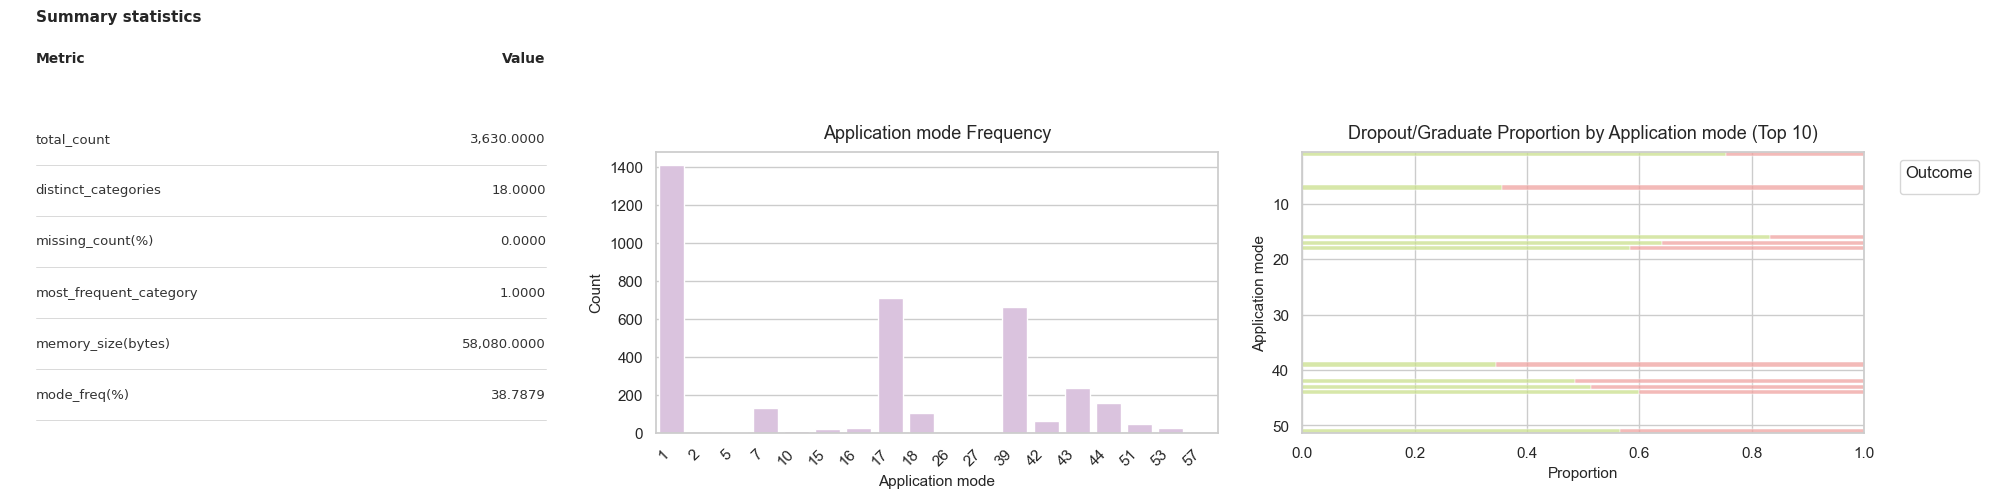

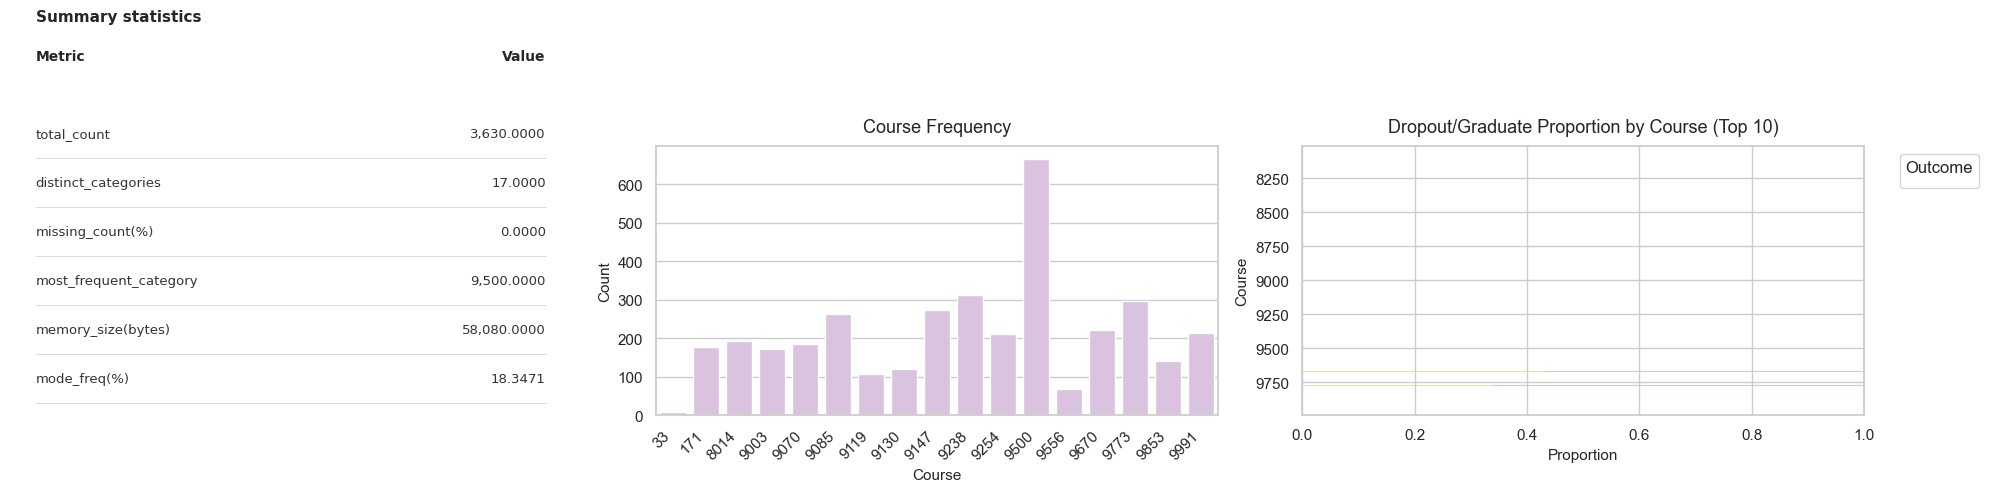

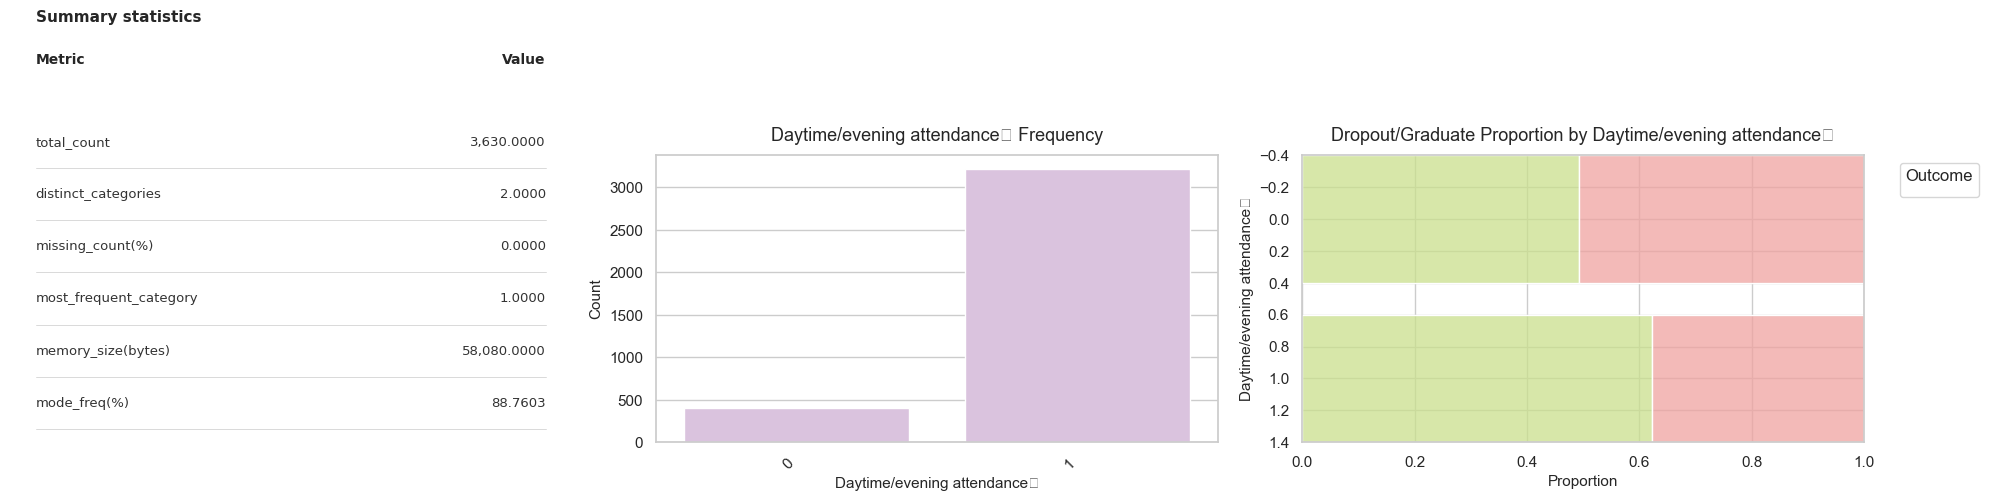

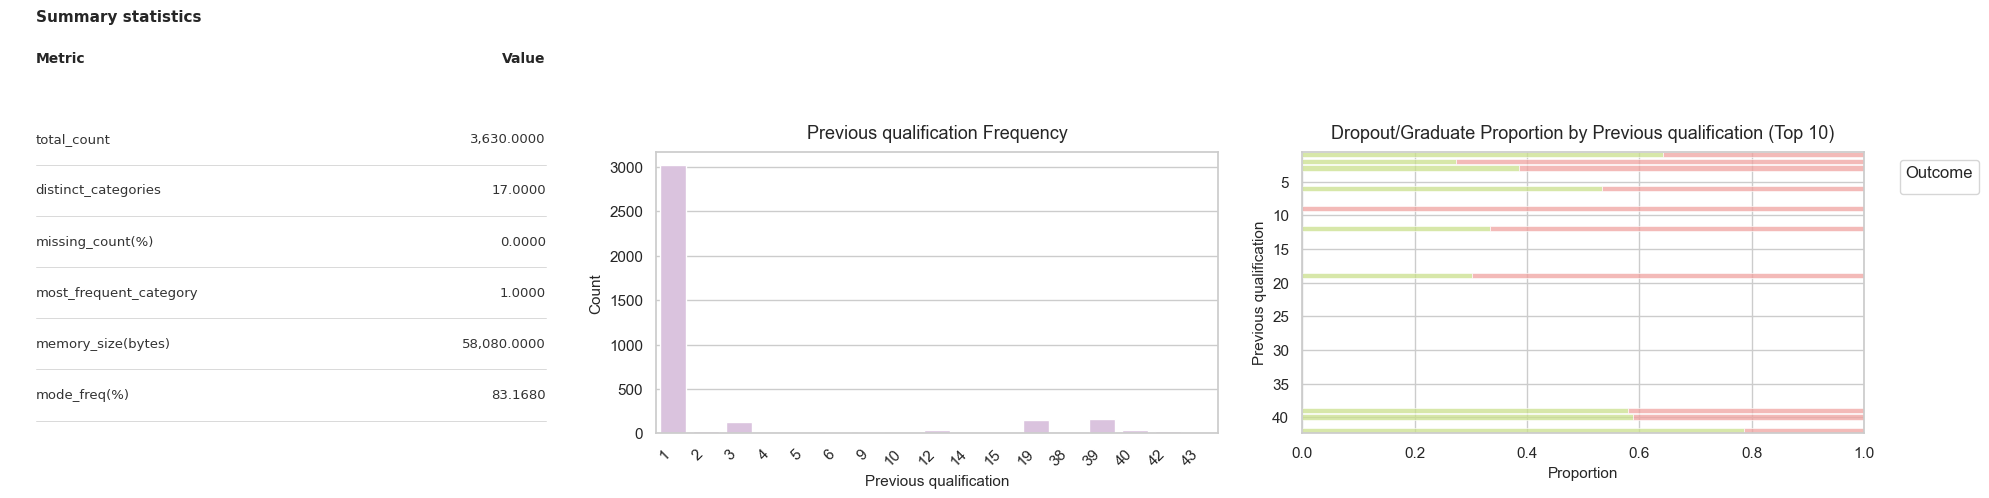

In [11]:
visualize_features_cards(df, numerical_academic_background, categorical_academic_background, target_col='Target')

**C) Socio-Economic Data**

In [12]:
socio_economic_features = ["Father's qualification", "Mother's qualification", "Father's occupation", "Mother's occupation", 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder']

numerical_socio_economic = []
categorical_socio_economic = ["Father's qualification", "Mother's qualification", "Father's occupation", "Mother's occupation", 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder']

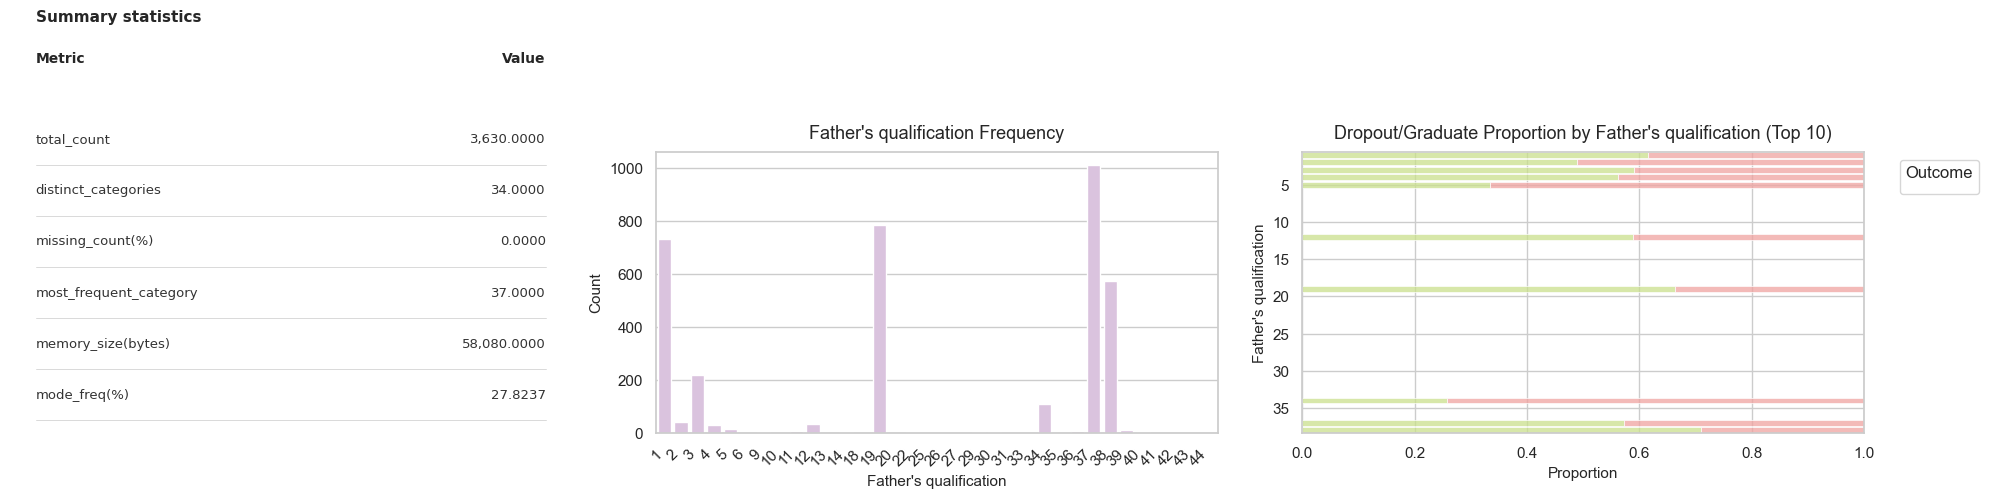

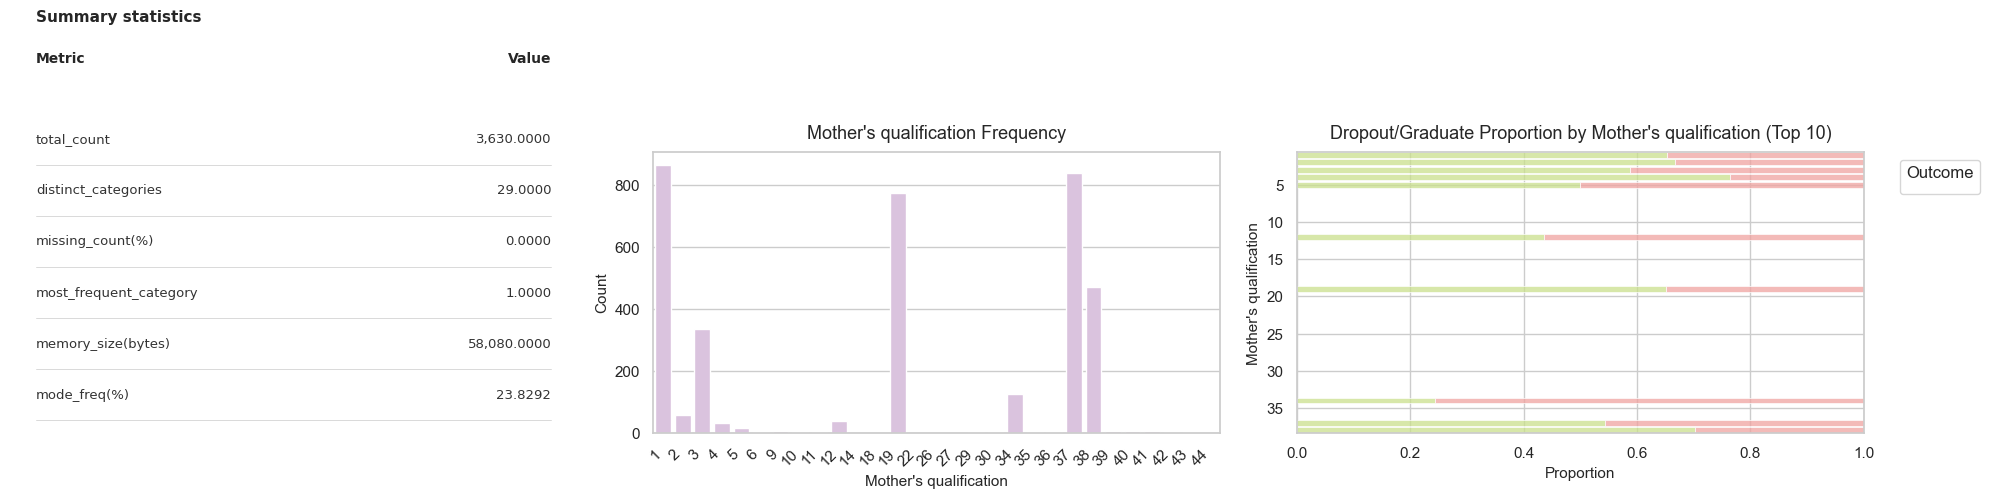

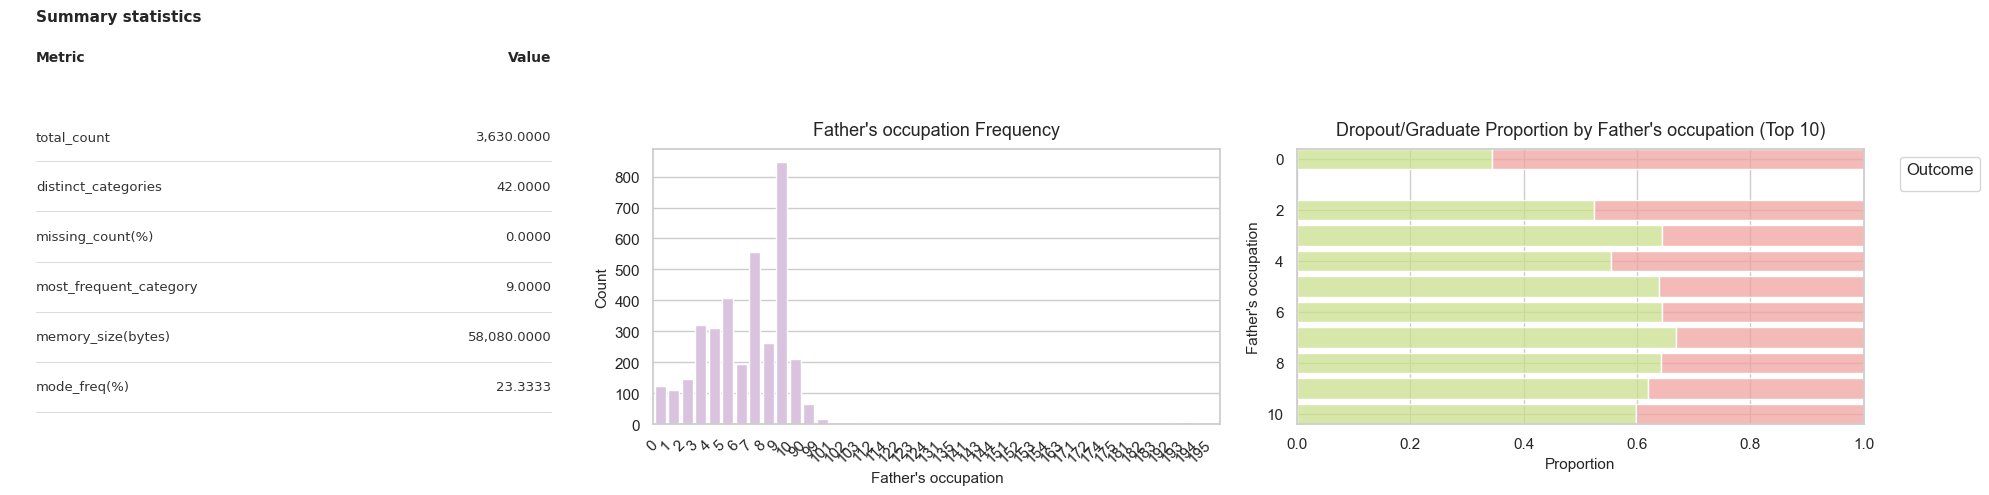

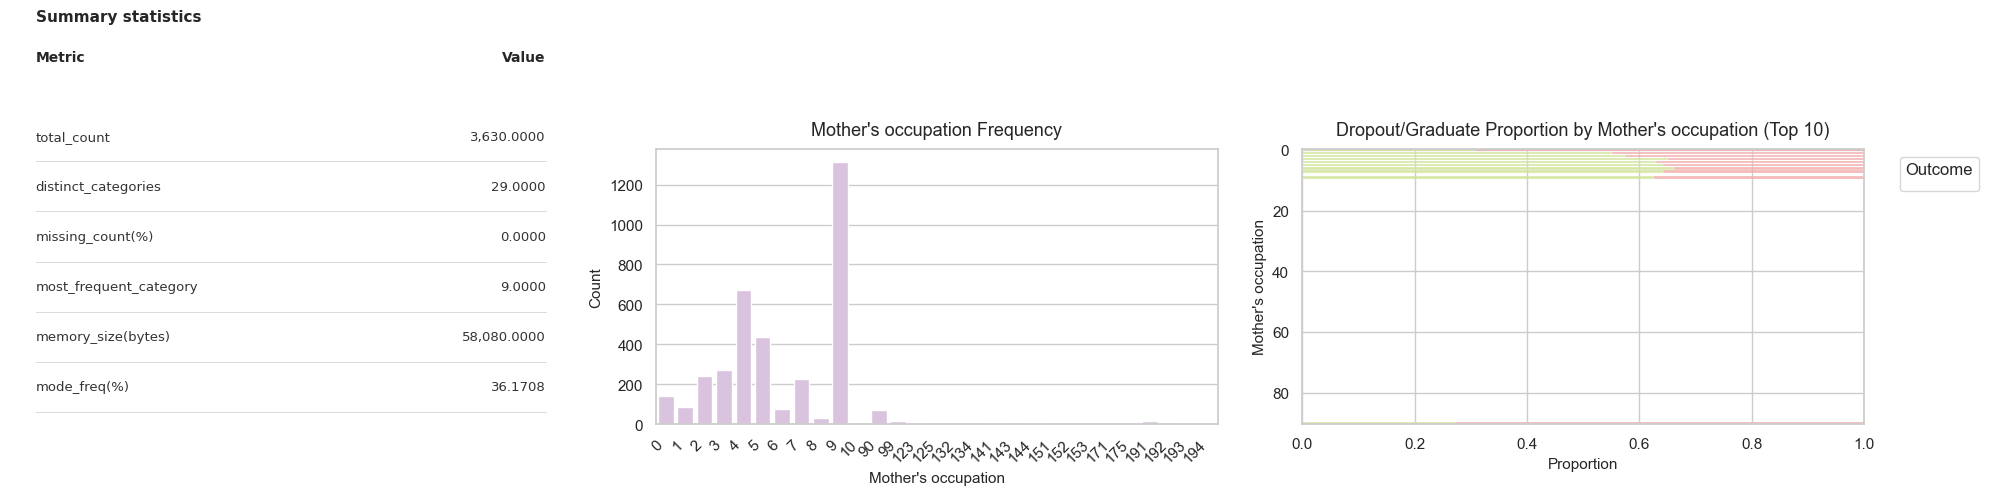

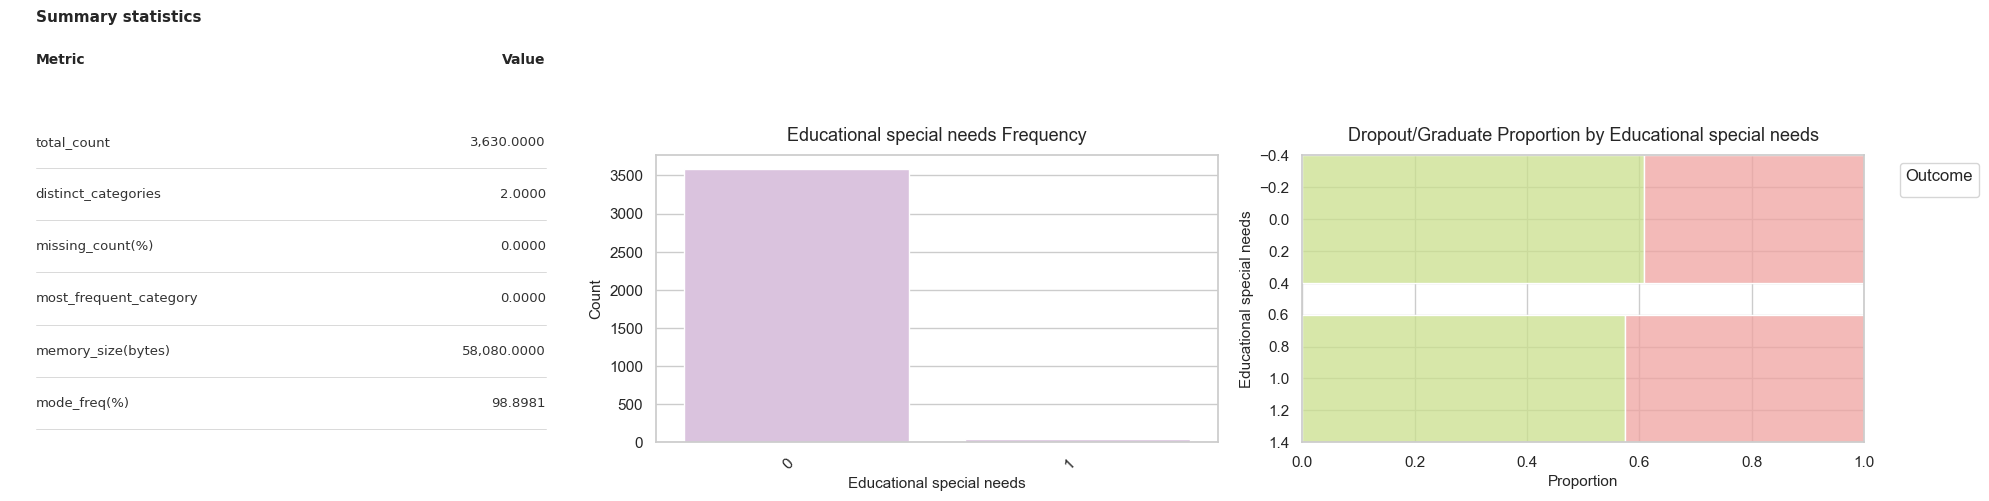

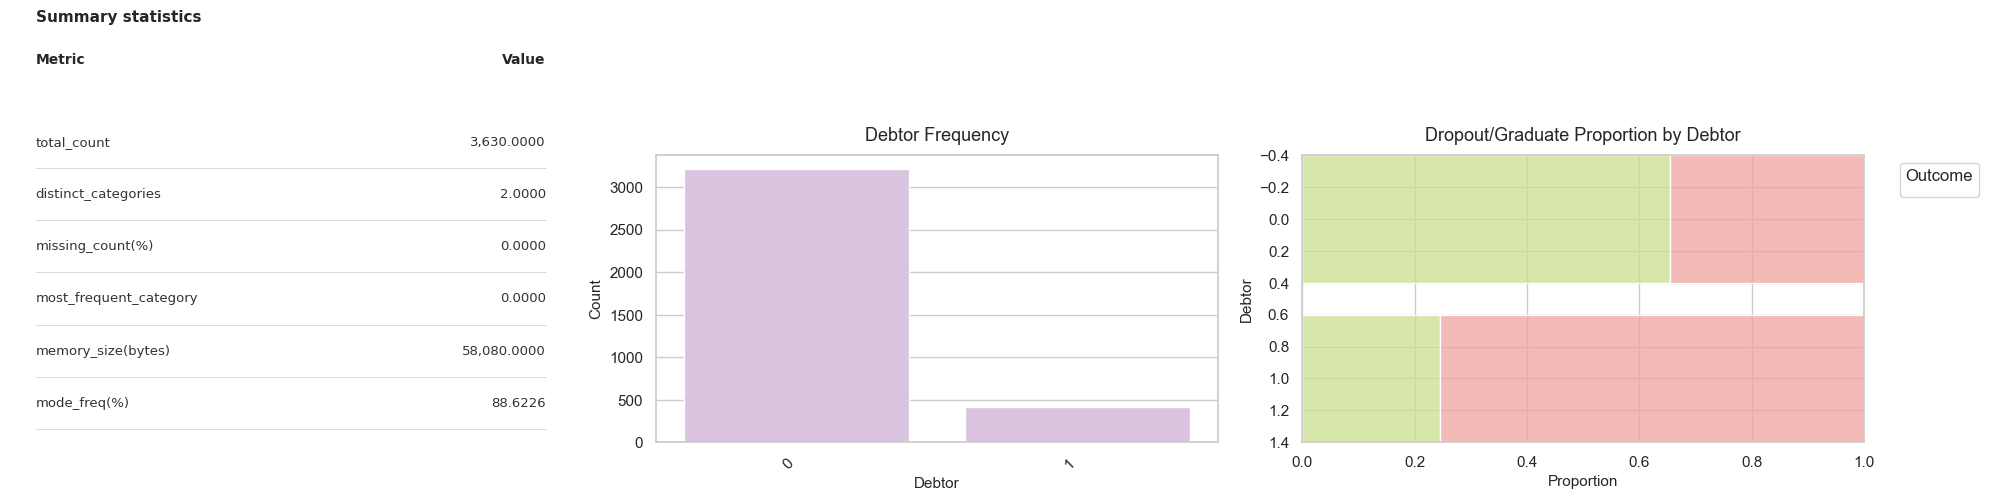

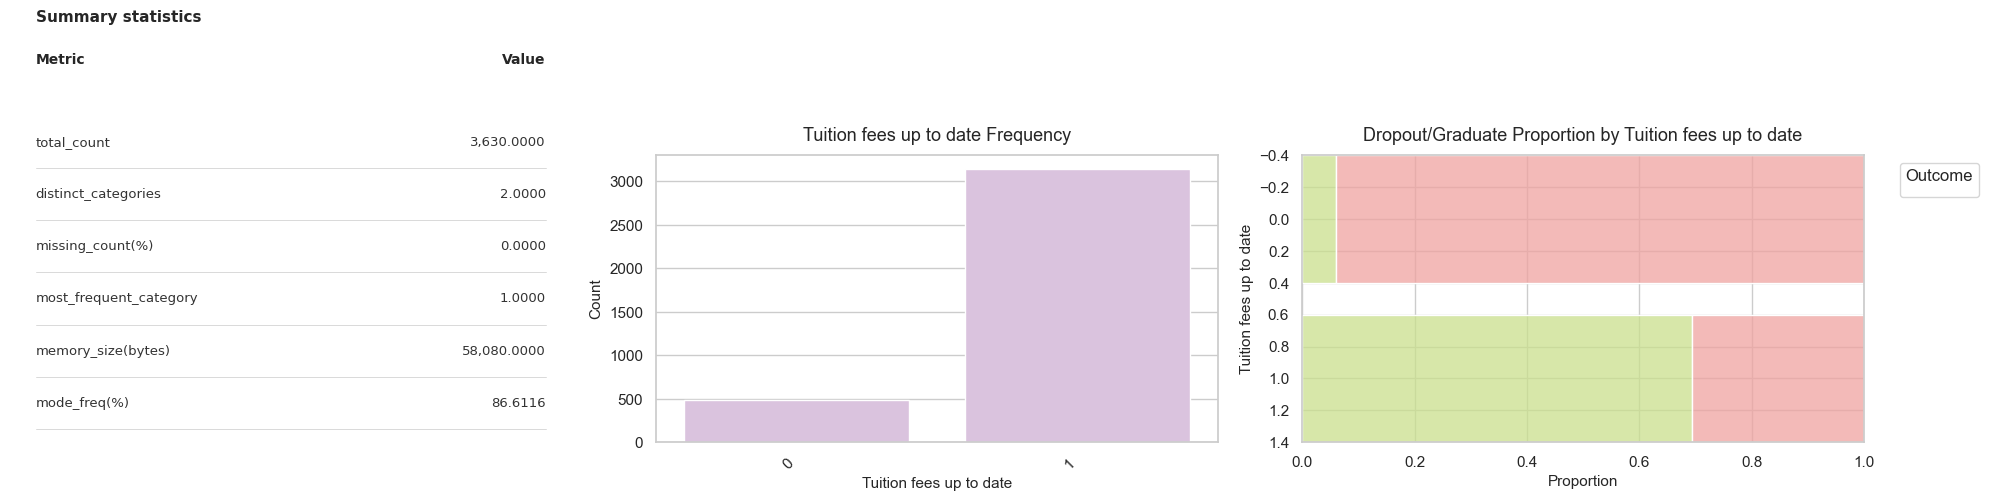

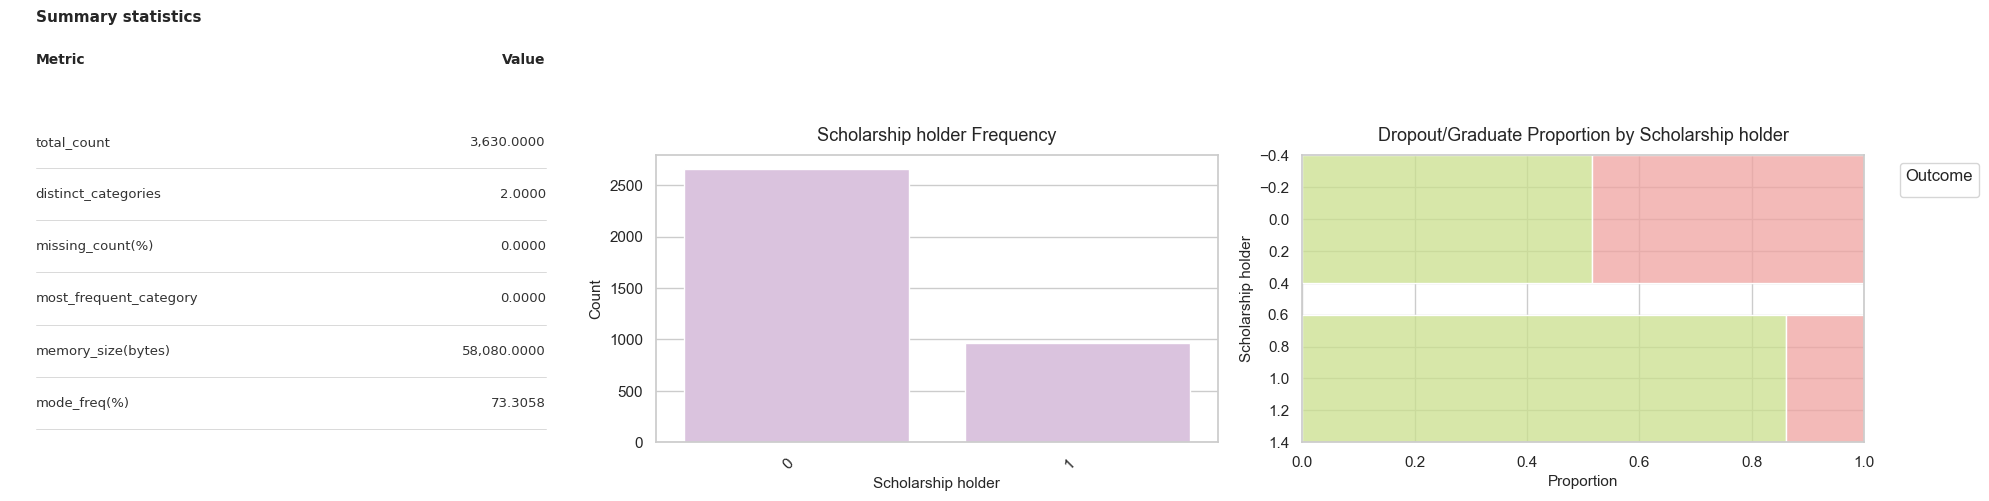

In [13]:
visualize_features_cards(df, numerical_socio_economic, categorical_socio_economic, target_col='Target')

**D) Macro-Economic Data**

In [14]:
macro_economic_features = ['Unemployment rate', 'Inflation rate', 'GDP']
numerical_macro_economic = ['Unemployment rate', 'Inflation rate', 'GDP']
categorical_macro_economic = []

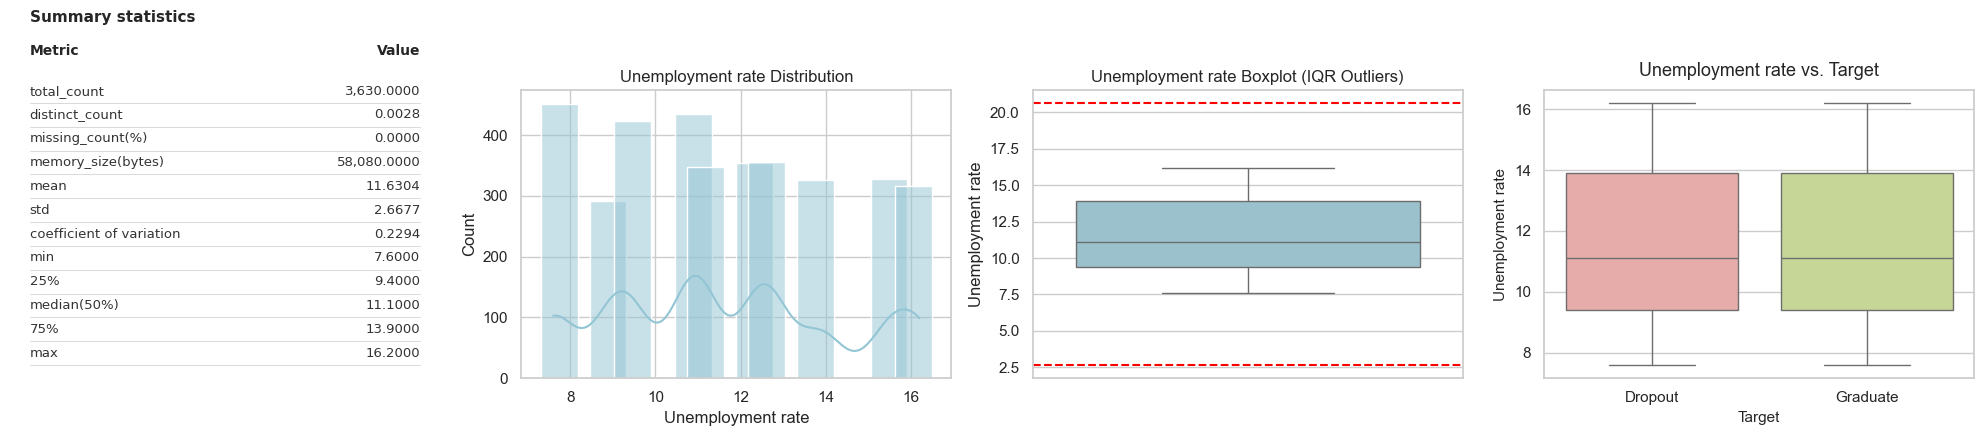

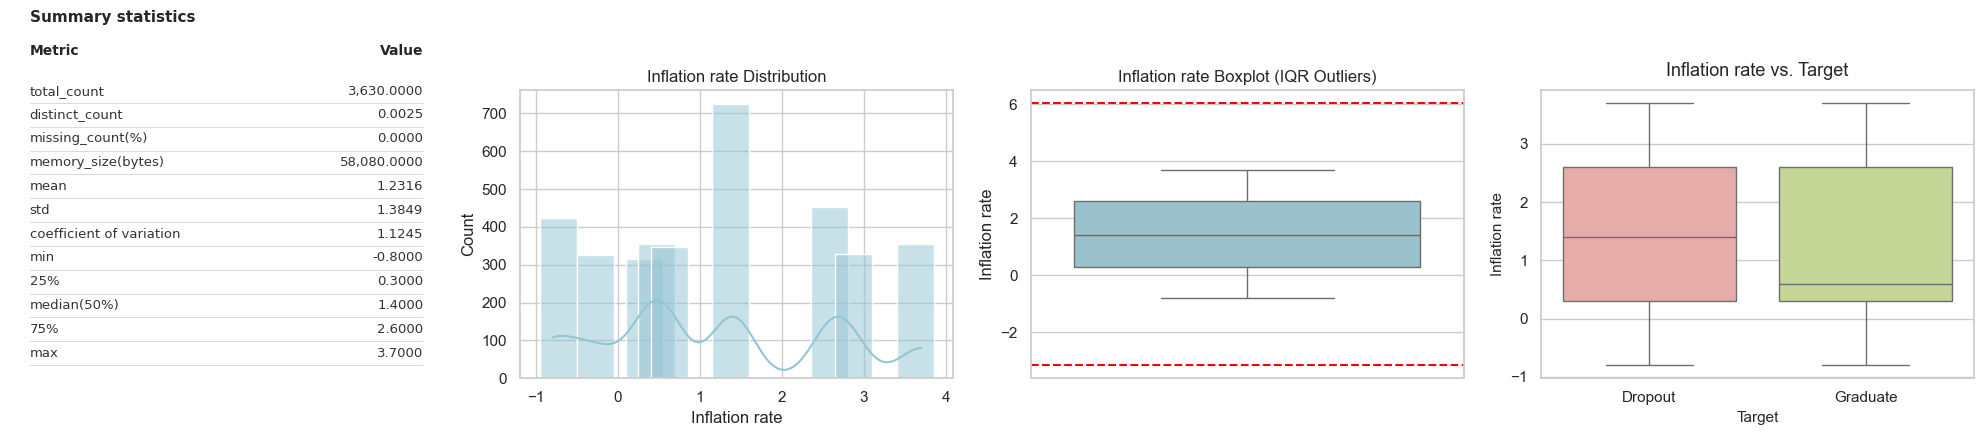

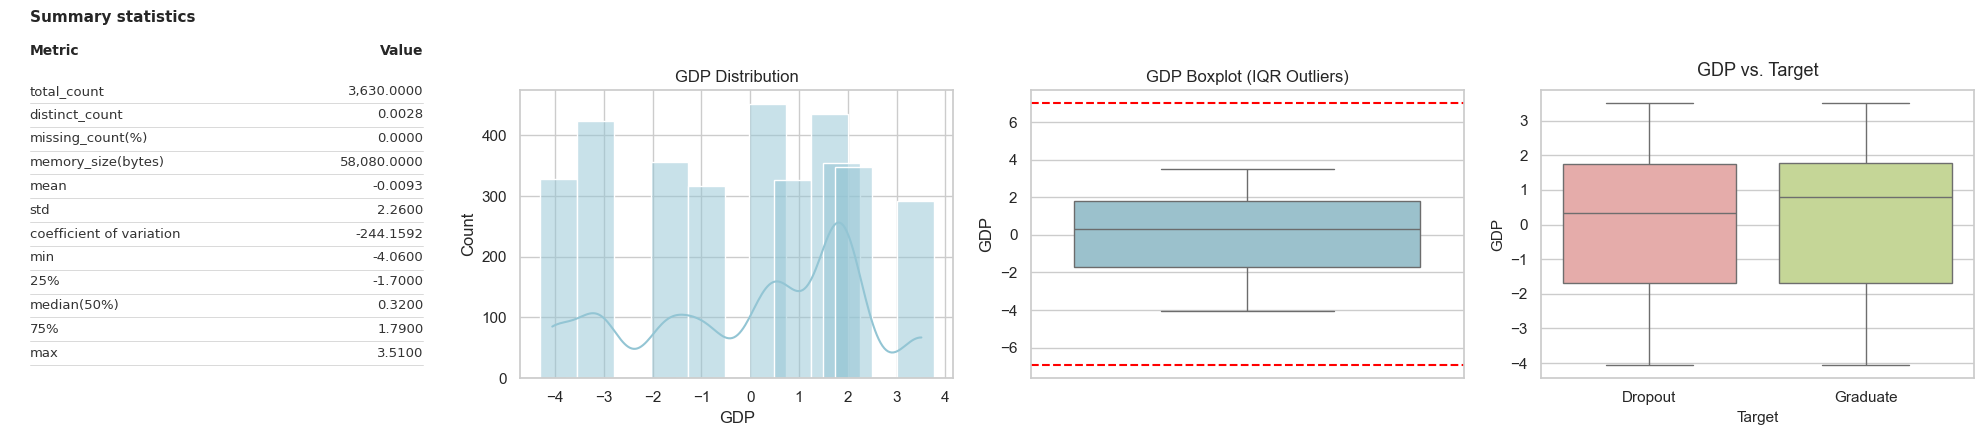

In [15]:
visualize_features_cards(df, numerical_macro_economic, categorical_macro_economic, target_col='Target')

**E) Academic Performance Data**

In [16]:
academic_performance_features = [
    'Curricular units 1st sem (credited)', 
    'Curricular units 1st sem (enrolled)', 
    'Curricular units 1st sem (evaluations)', 
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 
    'Curricular units 1st sem (without evaluations)',

    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)'
]

numerical_academic_performance = academic_performance_features
categorical_academic_performance = []

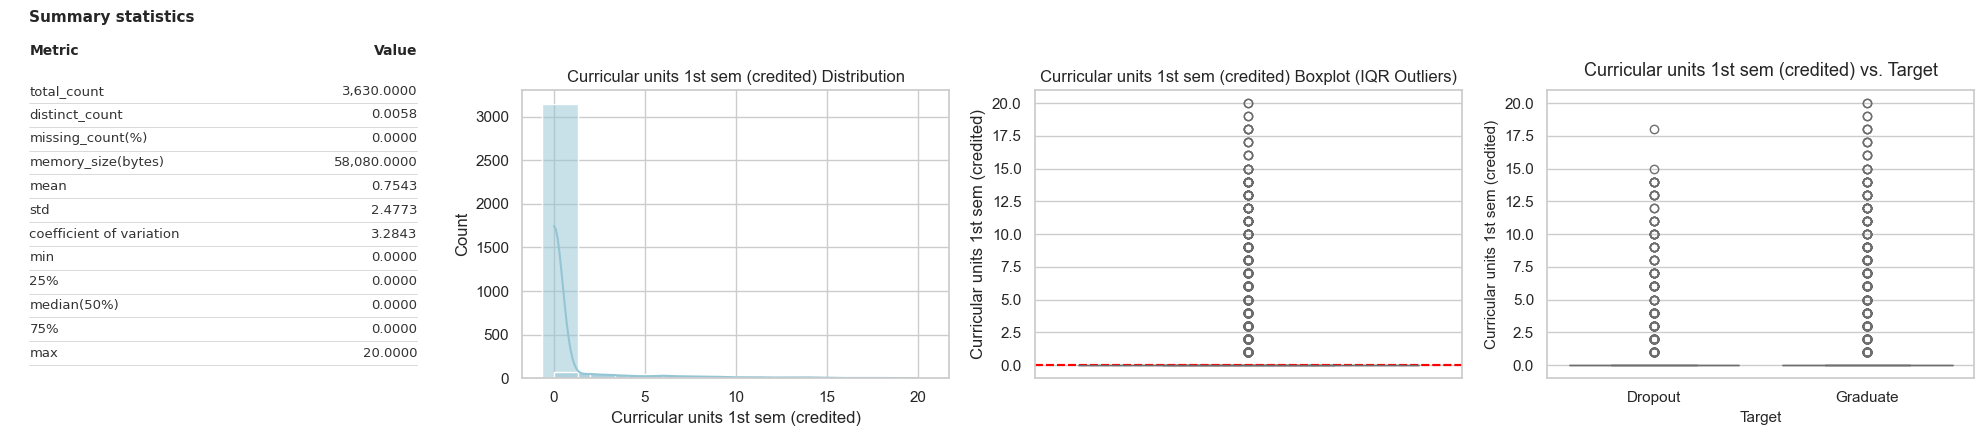

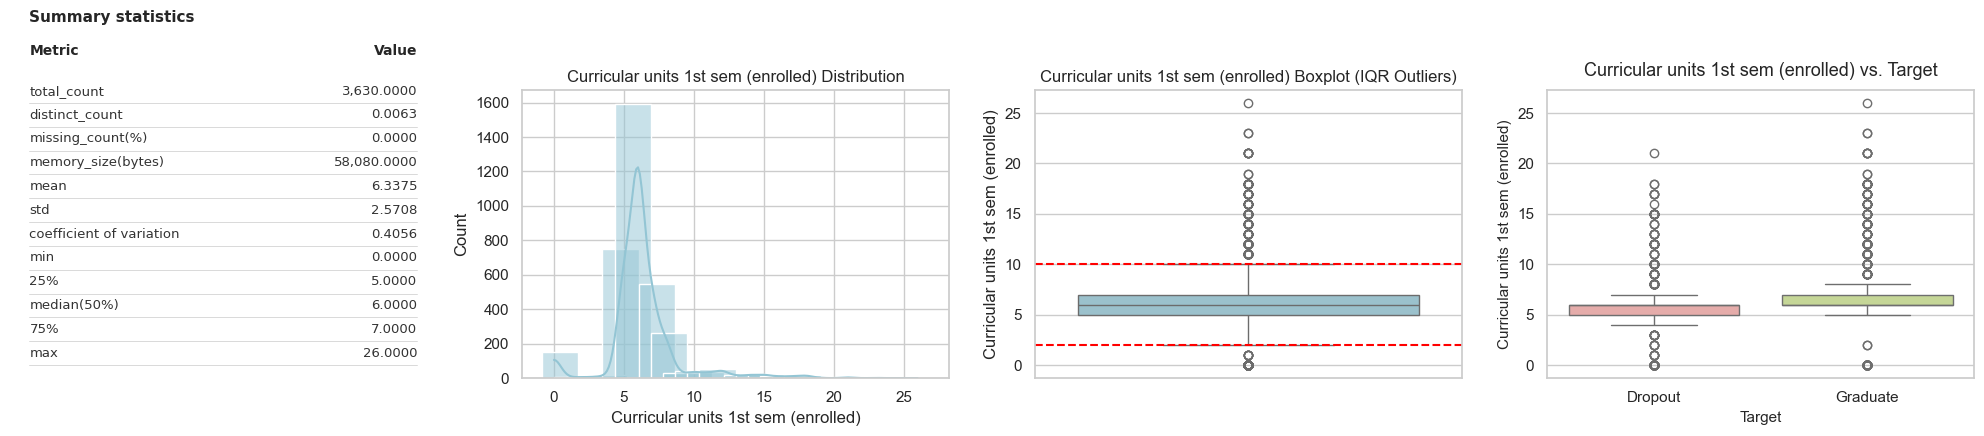

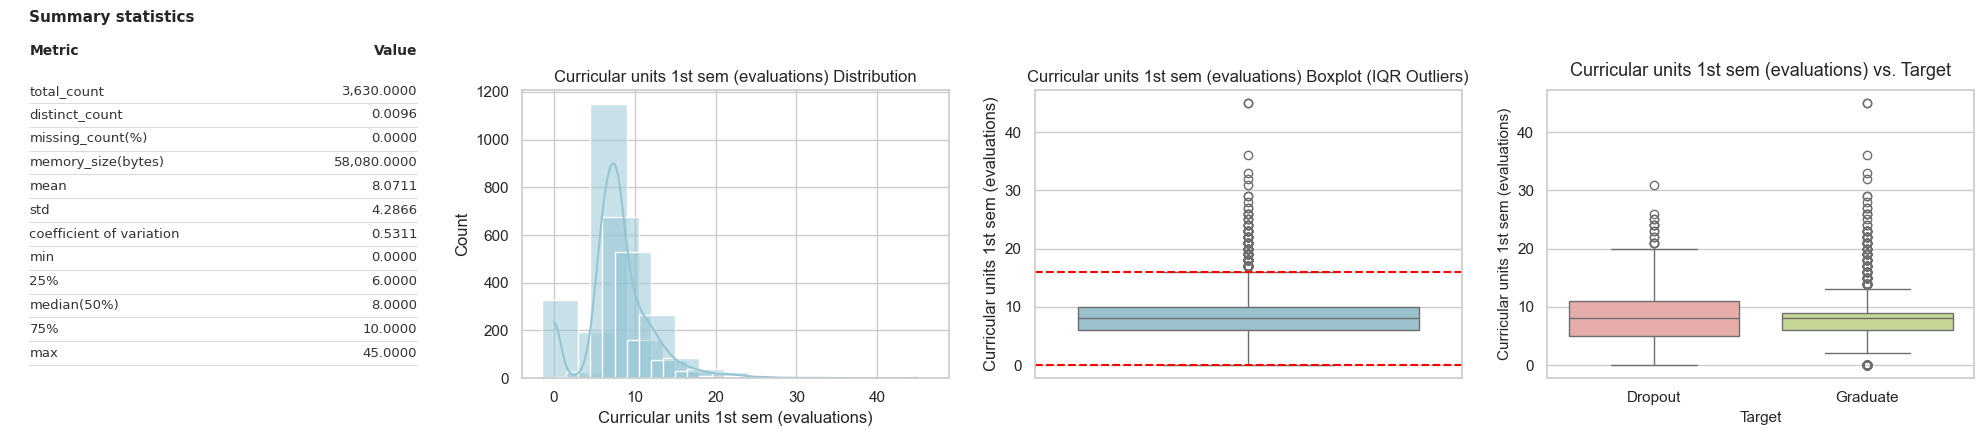

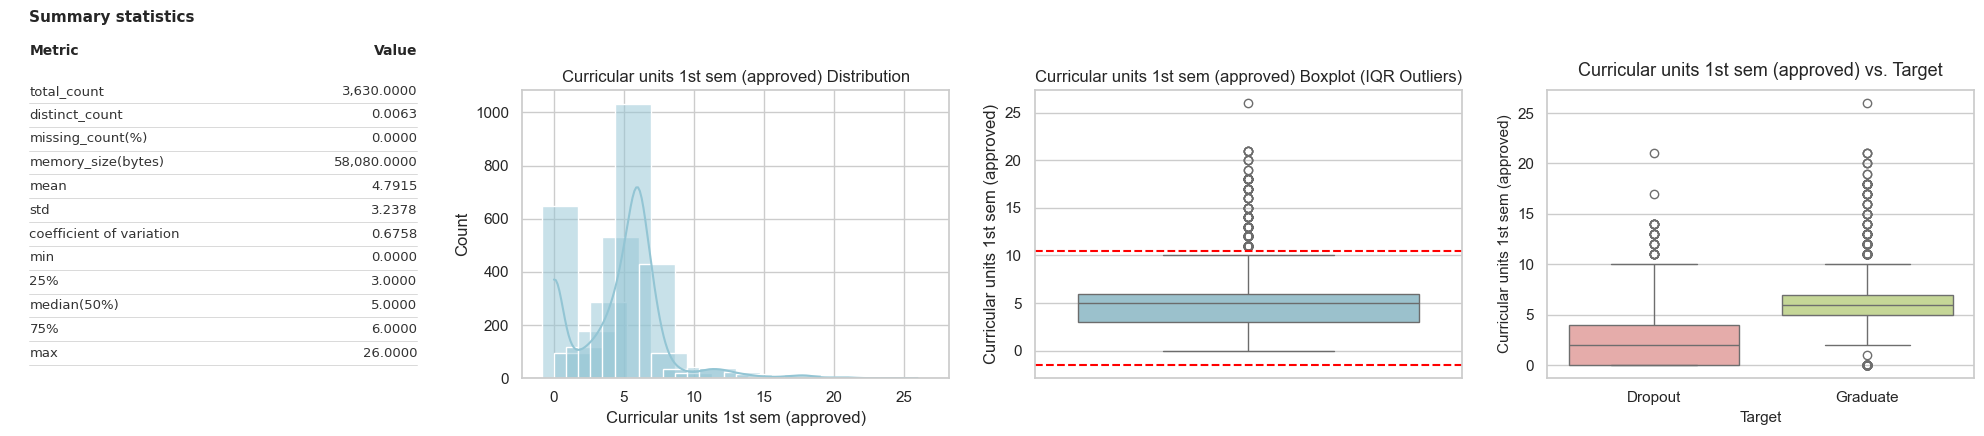

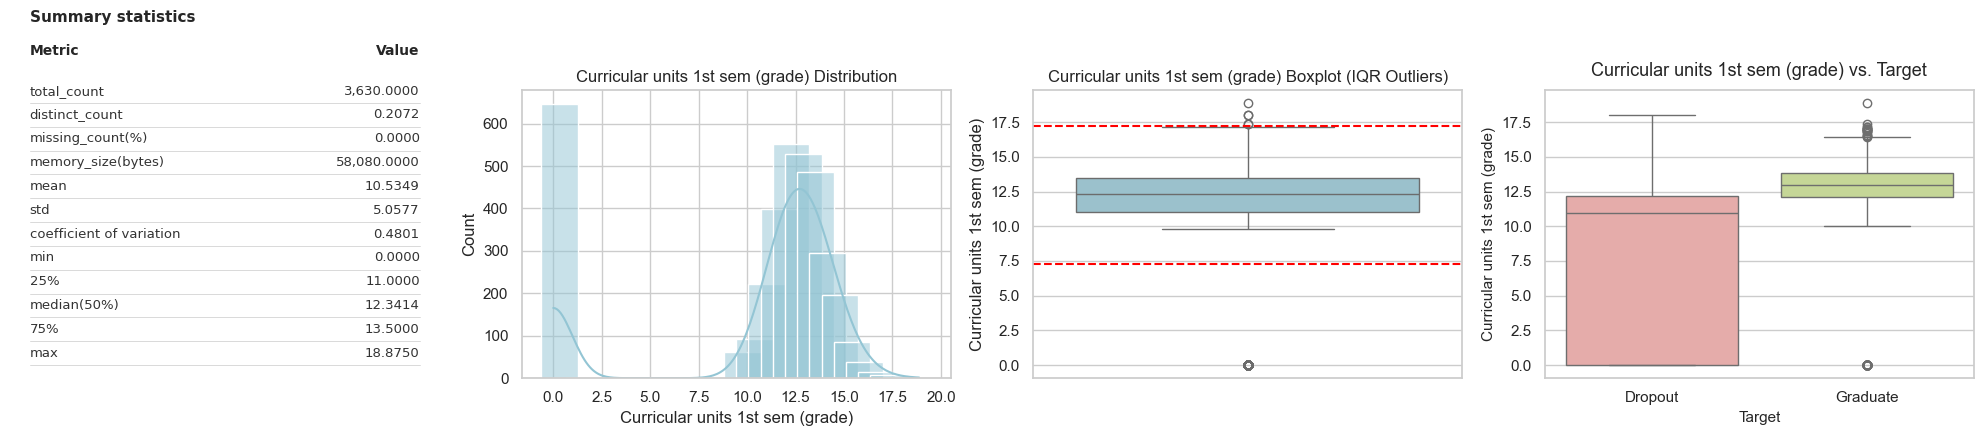

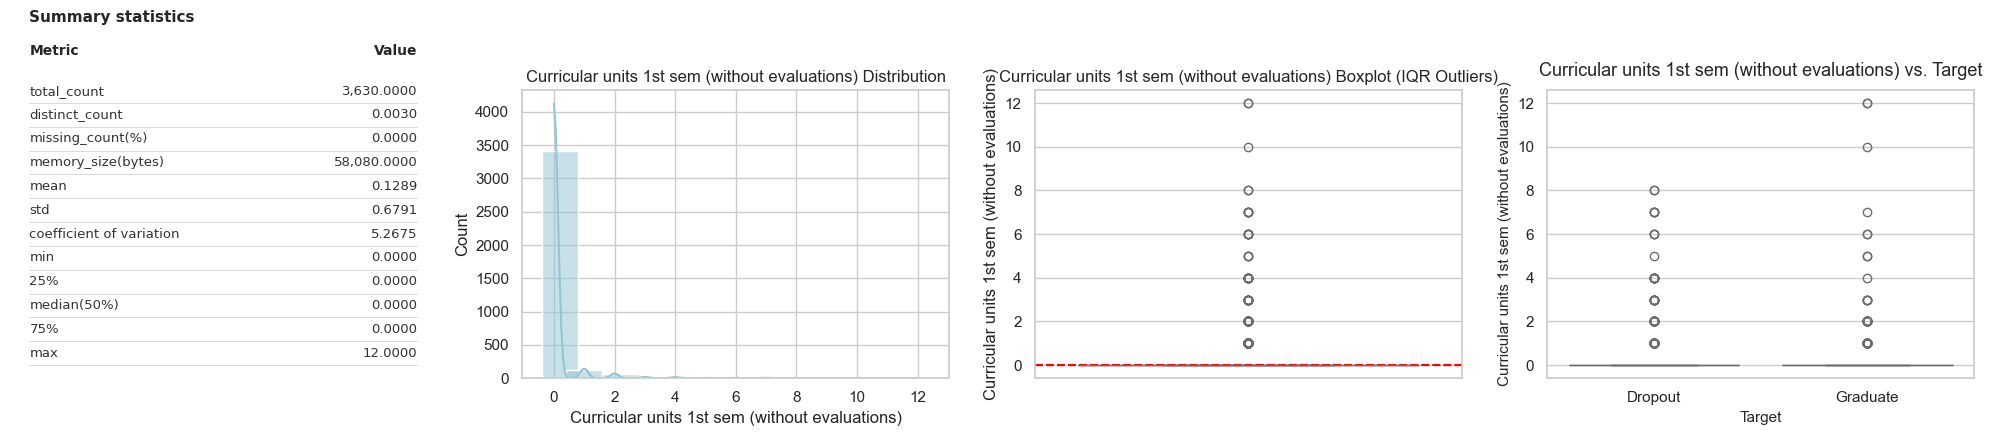

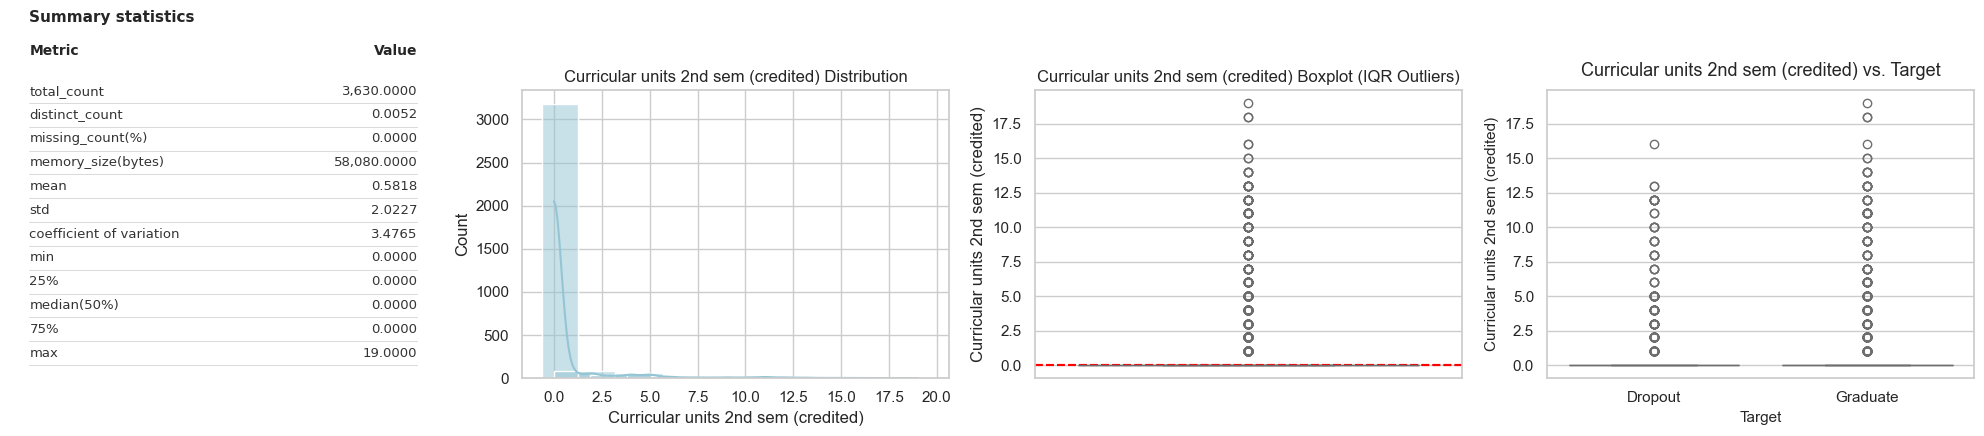

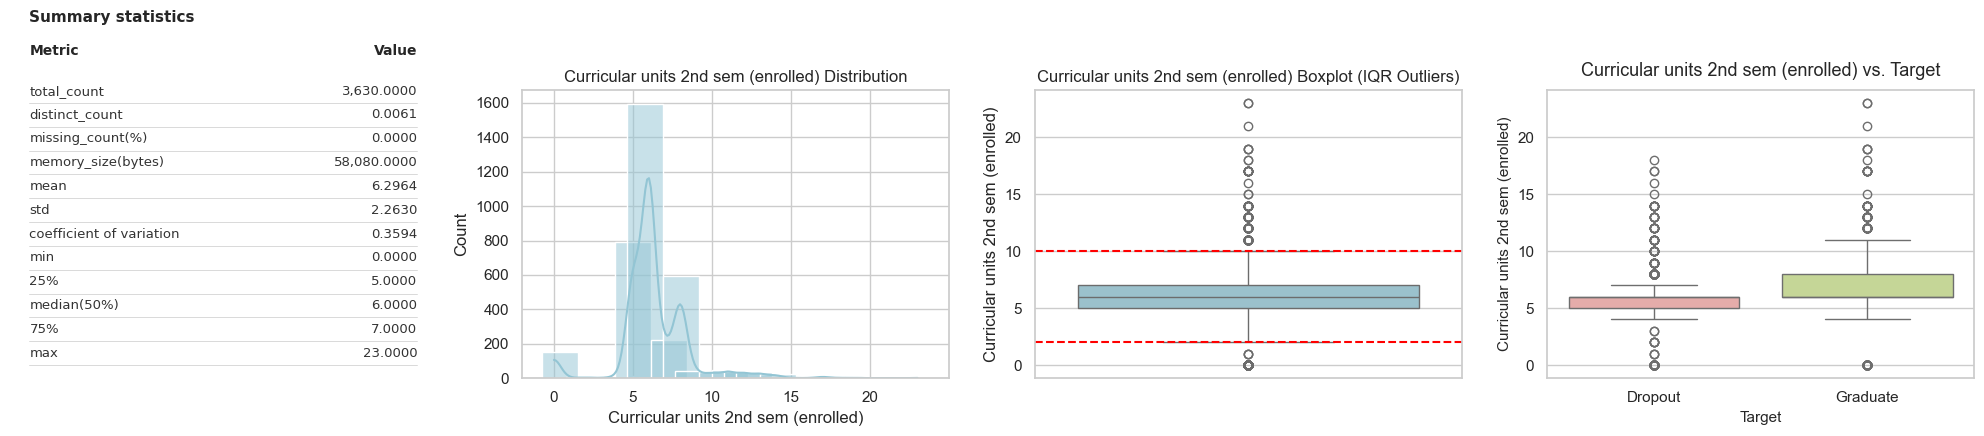

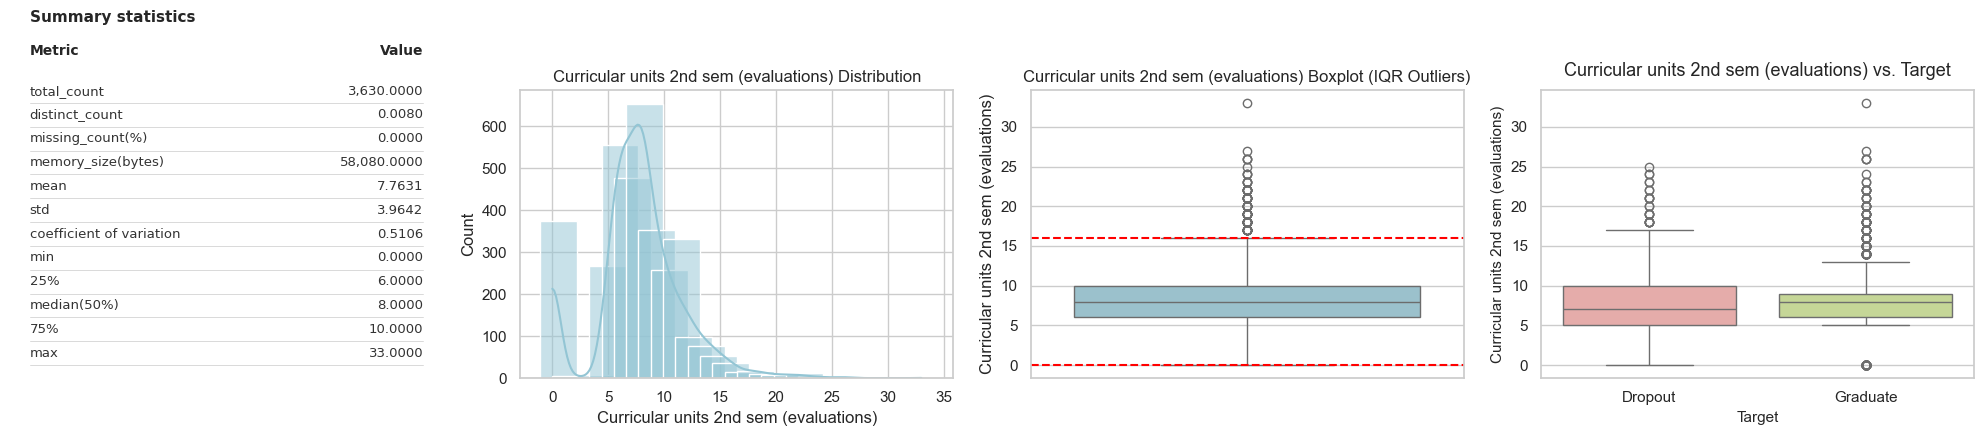

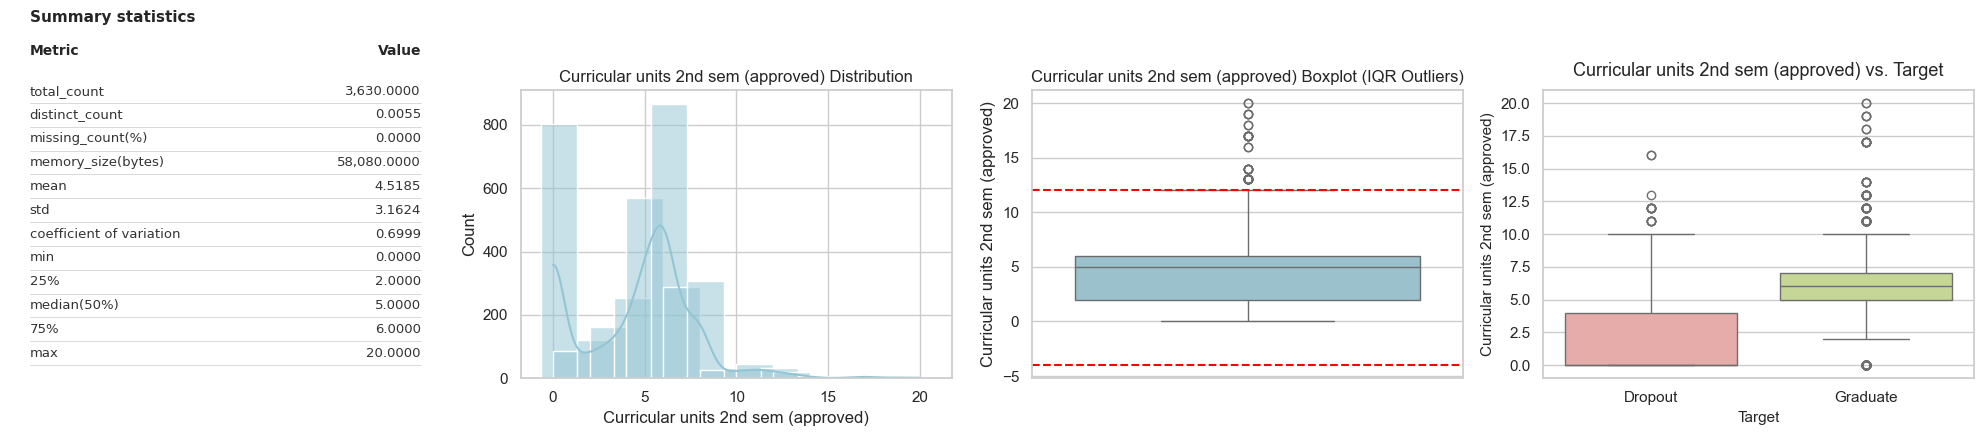

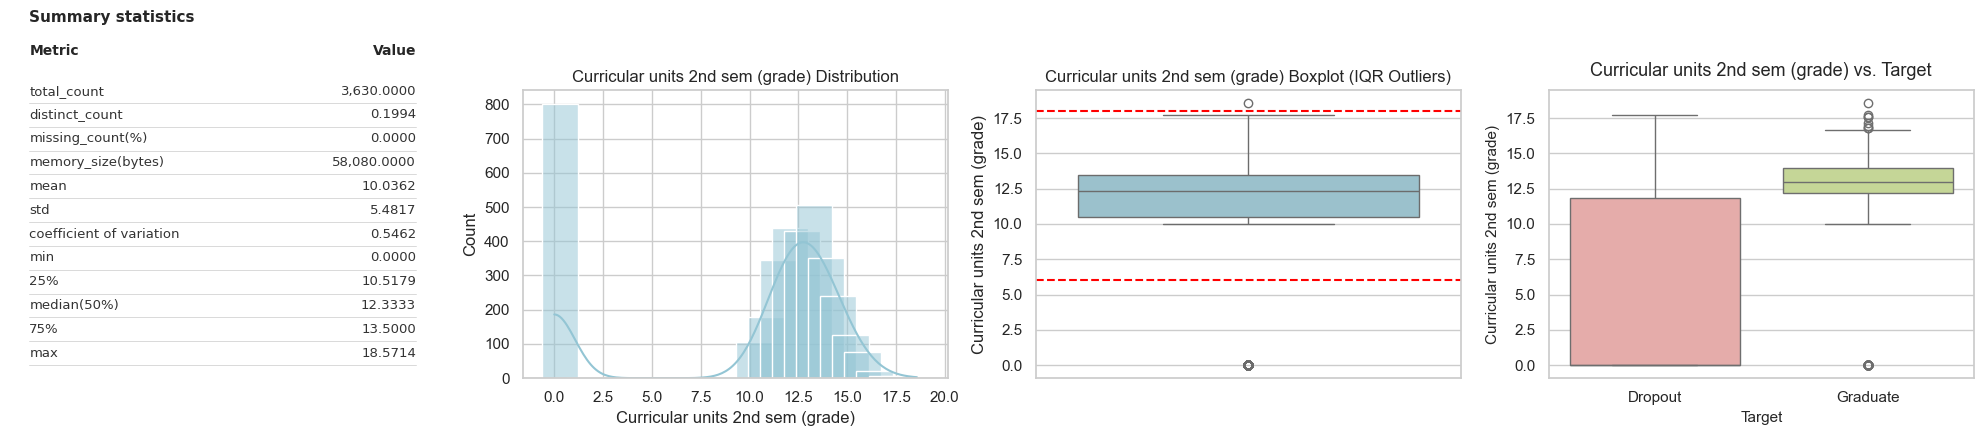

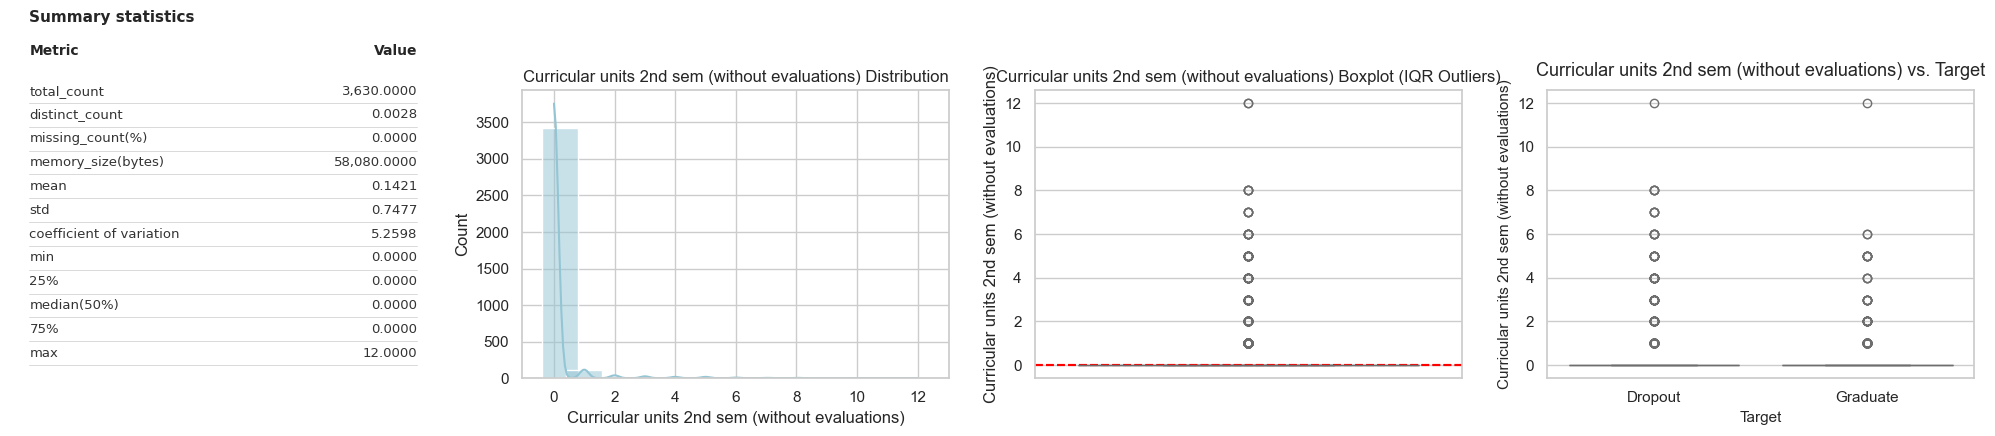

In [17]:
visualize_features_cards(df, numerical_academic_performance, categorical_academic_performance, target_col='Target')

**Multivariate Analysis**

- ***Analysing Correlations*** - analysing and quantifying the relation between features -> correlation matrix or heatmap
    
    Important about correlations:
    - Numeric vs. Numeric correlations: measured using Spearman's rank correlation coefficient
    - Categorical vs. Categorical correlations: measured using Cramer's V
    - Numerical vs. Categorical correlations: also use Cramer's V, where the numeric feature is first discritized

In [18]:
numeric_features = numerical_demographic + numerical_academic_background + numerical_socio_economic + numerical_macro_economic + numerical_academic_performance
categorical_features = categorical_demographic + categorical_academic_background + categorical_socio_economic + categorical_macro_economic + categorical_academic_performance

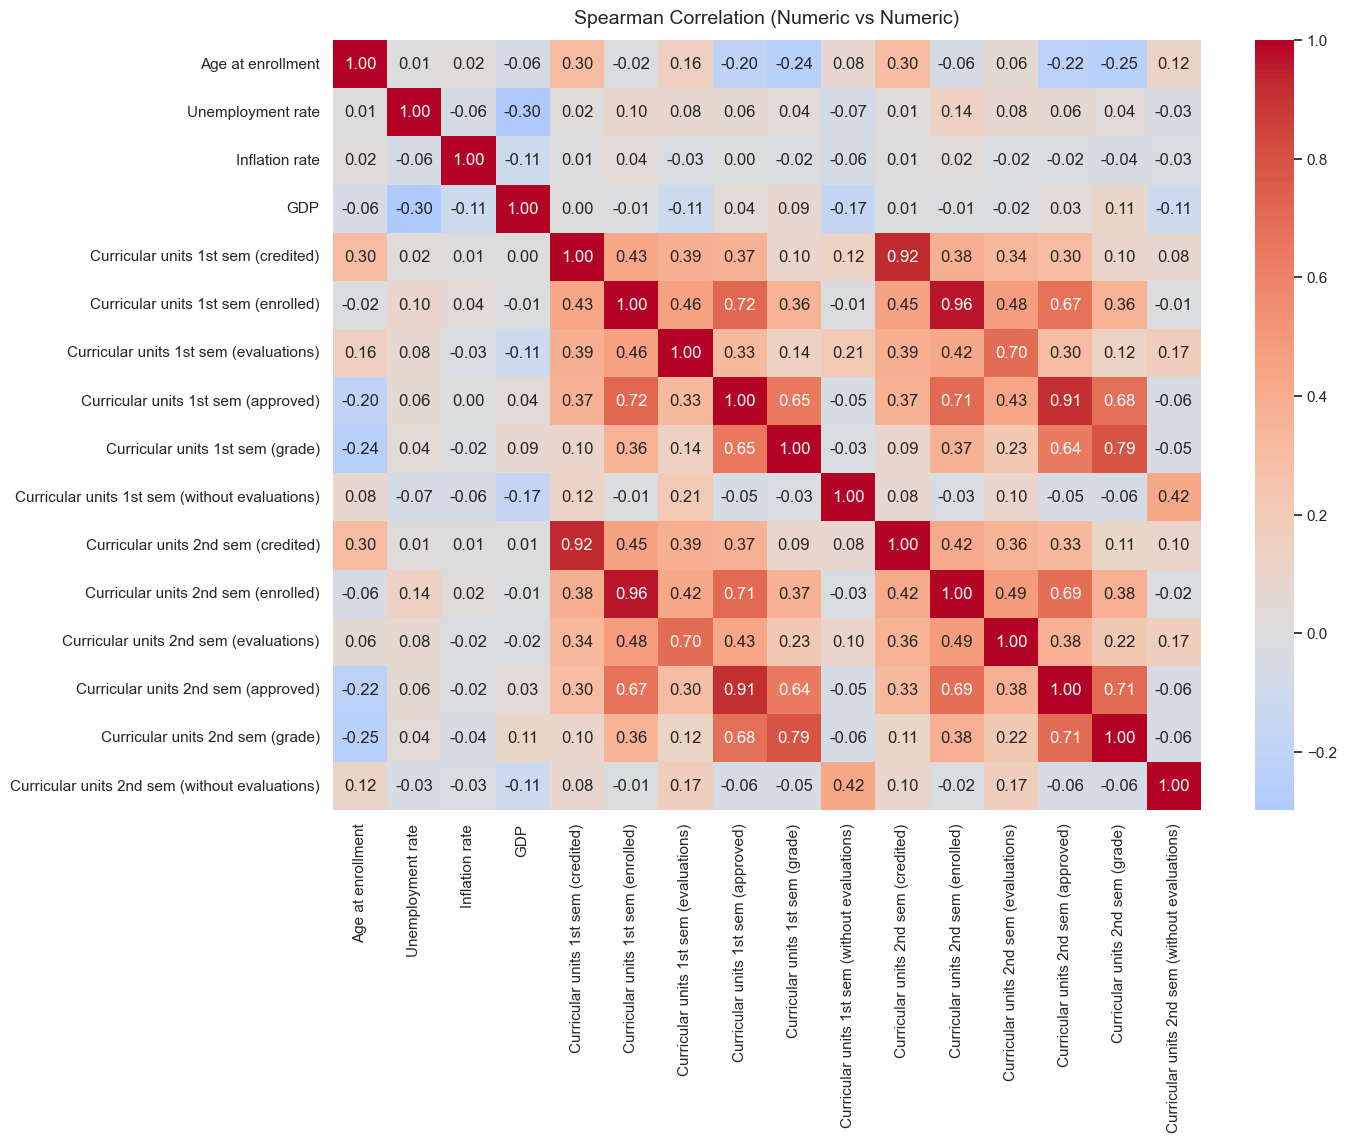

In [19]:
plot_numeric_correlation_matrix(df, numeric_features)

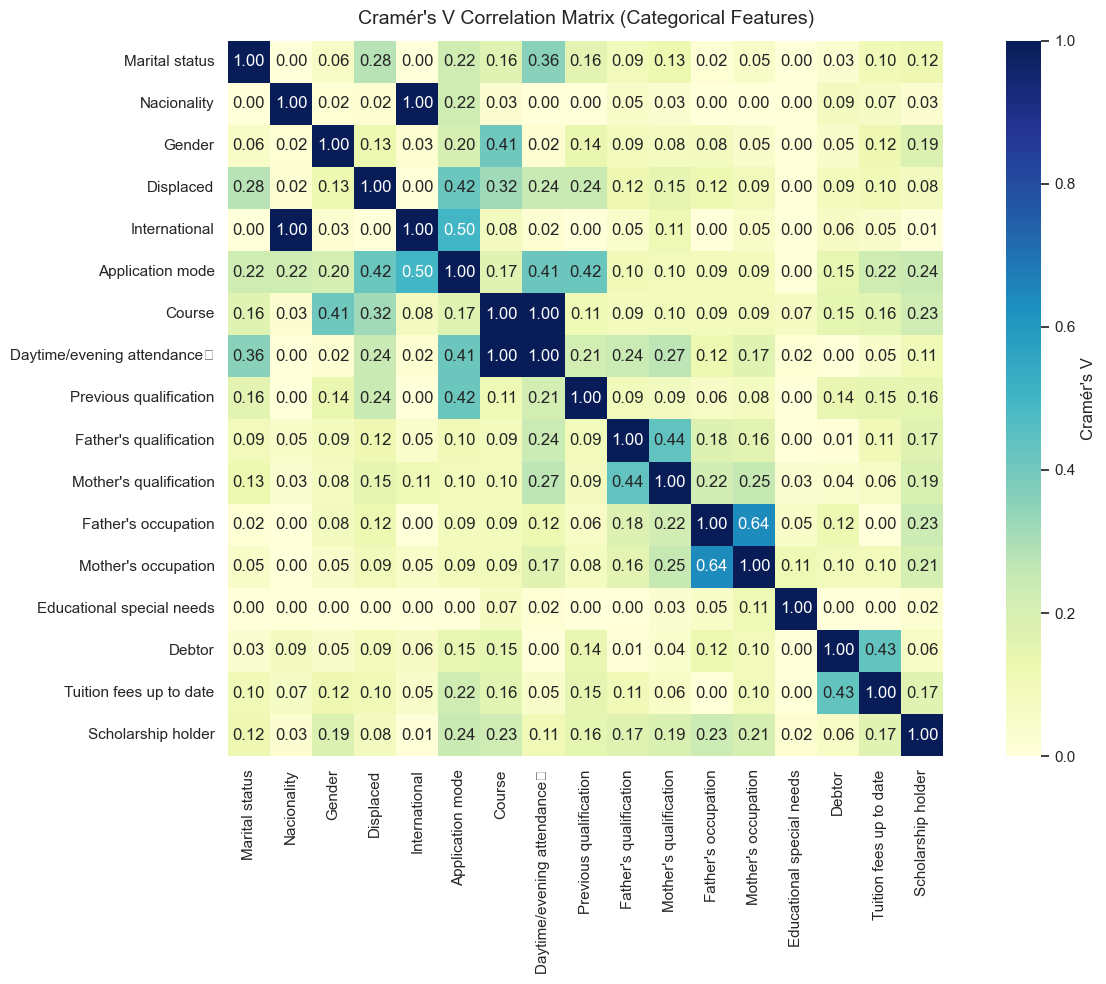

In [20]:
plot_categorical_correlation_matrix(df, categorical_features)

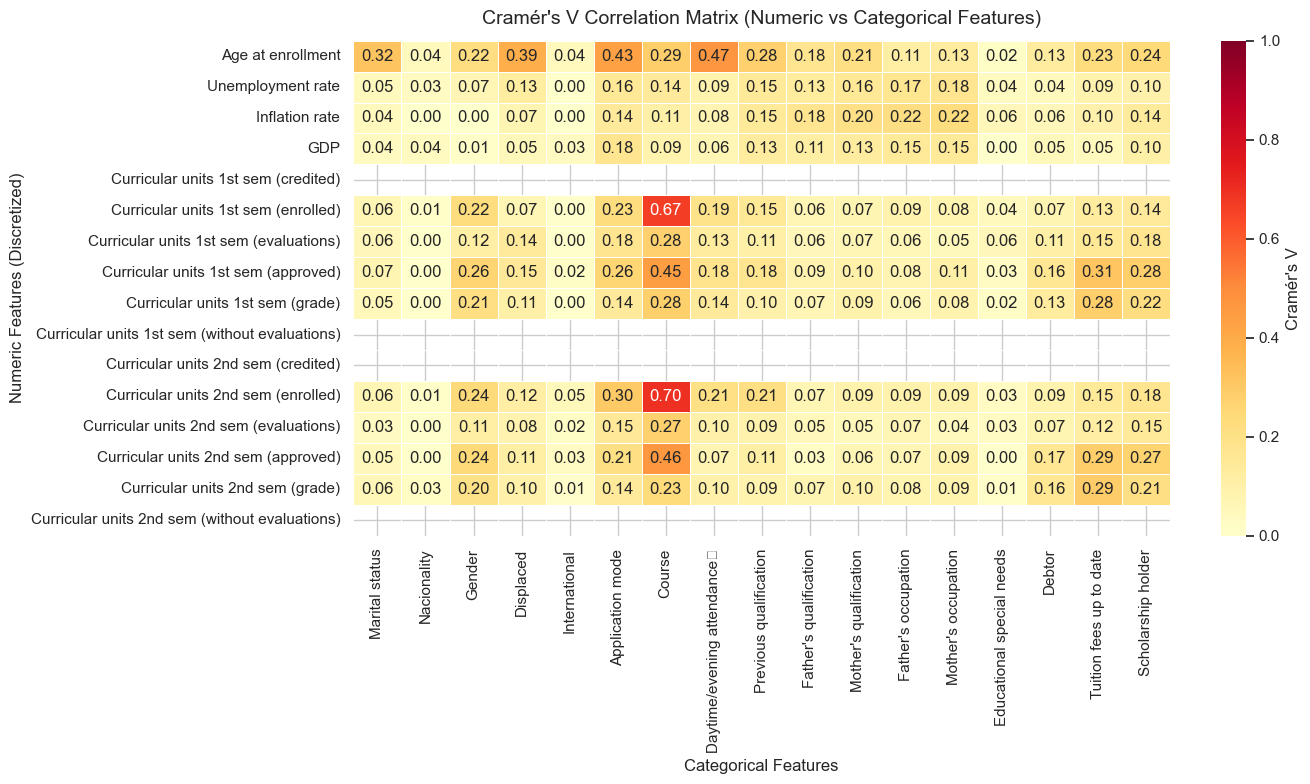

In [21]:
plot_numeric_categorical_correlation_matrix(df, numeric_features, categorical_features)

<a id="data-summarization-and-reduction"></a>
#### **Data Summarization and Reduction**


PCA e t-SNE 

<a id="in-modelling-explanations"></a>
### **In-Modelling Explanations**


In [22]:
from utils.in_modelling_utils import *

In Task 1, we uncovered key pre-modeling insights using exploratory analysis and dimensionality reduction:

- **PCA** showed  partial linear patterns distinguishing dropouts from graduates (~39% variance).
- **t-SNE** revealed stronger non-linear structure and distinct clusters of dropouts.
- Certain features (e.g., nationality, gender, curricular units) show strong imbalance and potential predictive power.

Our goal in Task 2 is to train transparent ("glass-box") models that can:

- Achieve meaningful prediction accuracy on this multiclass task (Dropout, Enrolled, Graduate).
- Provide **human-interpretable explanations** of global feature importance and local decisions.

We’ll begin with:
- **Decision Tree Classifier**: simple, transparent, and easy to visualize.
- **Explainable Boosting Machine (EBM)**: an additive model that captures non-linear effects while maintaining interpretability.

In [23]:
# Target mapping encoding
target_mapping = {'Dropout': 0, 'Graduate': 1}
df['Target'] = df['Target'].map(target_mapping)
# Train-test split
X_train, X_test, y_train, y_test = split_data(df, target_col='Target', test_size=0.2, random_state=42)

<a id="decision-tree-classifier"></a>
#### **Decision Tree Classifier**


Our dataset includes categorical (e.g., gender) and non-linear relationships (as seen in t-SNE). So we need models that can handle these patterns without becoming black boxes.

We begin with a Decision Tree classifier limited to depth 3 to establish a **baseline**  for both interpretability and predictive performance.

Why depth 3? A shallow tree allows us to:

- Identify the most influential features early in the decision process.

- Maintain clear visual interpretability, which aligns with the goals of explainable AI (XAI).

- Provide a readable explanation path that humans (e.g., education stakeholders) can follow.

This serves as our starting point to explore how tree depth influences the **balance between model accuracy and explanatory clarity.**

              precision    recall  f1-score   support

           0       0.93      0.79      0.86       284
           1       0.88      0.96      0.92       442

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.89       726



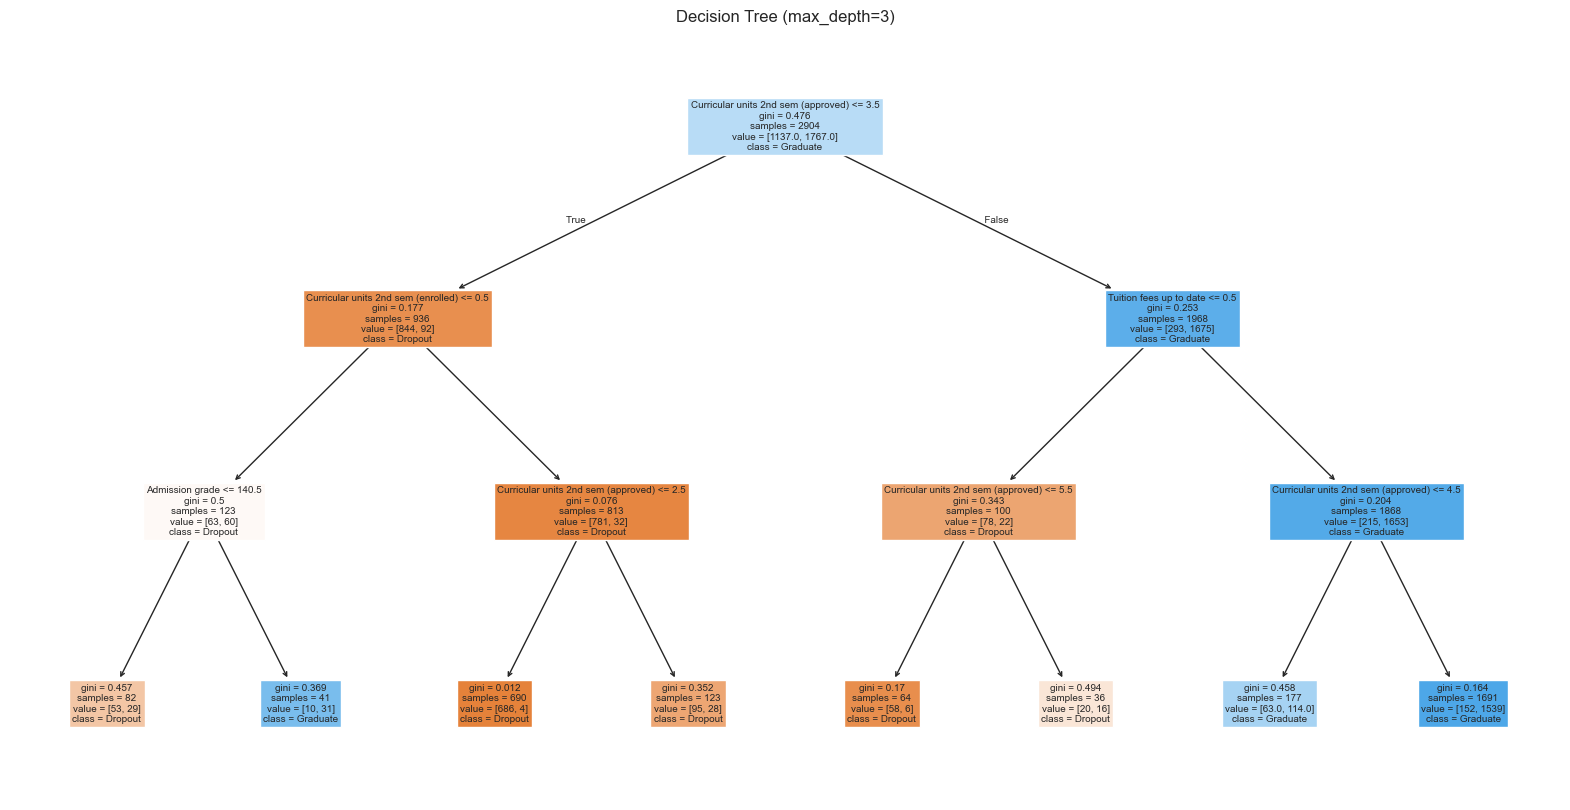

DecisionTreeClassifier(max_depth=3, random_state=42)

In [24]:
decision_tree_classifier(X_train, y_train, X_test, y_test, max_depth=3, random_state=42)

**Results and Interpretability - Depth 3**

Accuracy: 0.89 — the model shows strong overall predictive performance.

Class-wise Performance:

- Dropouts: High precision (0.92) and solid recall (0.78) indicate the model effectively identifies most students at risk.

- Graduates: Excellent recall (0.96) and balanced precision (0.87), showing strong reliability in detecting successful students.

**Interpretability**:

The tree is shallow and easy to read, with splits driven mainly by academic performance and engagement factors:

- Curricular units approved and enrolled (2nd semester) – strongest determinants of success or dropout.

- Tuition fees up to date – indicates financial stability and academic persistence.

- Previous qualification and admission grades – reflect baseline academic readiness.

*How increasing the depth to 4 will influence the tradeoff between accuracy and interpretability?*

              precision    recall  f1-score   support

           0       0.92      0.77      0.84       284
           1       0.87      0.96      0.91       442

    accuracy                           0.89       726
   macro avg       0.89      0.87      0.88       726
weighted avg       0.89      0.89      0.88       726



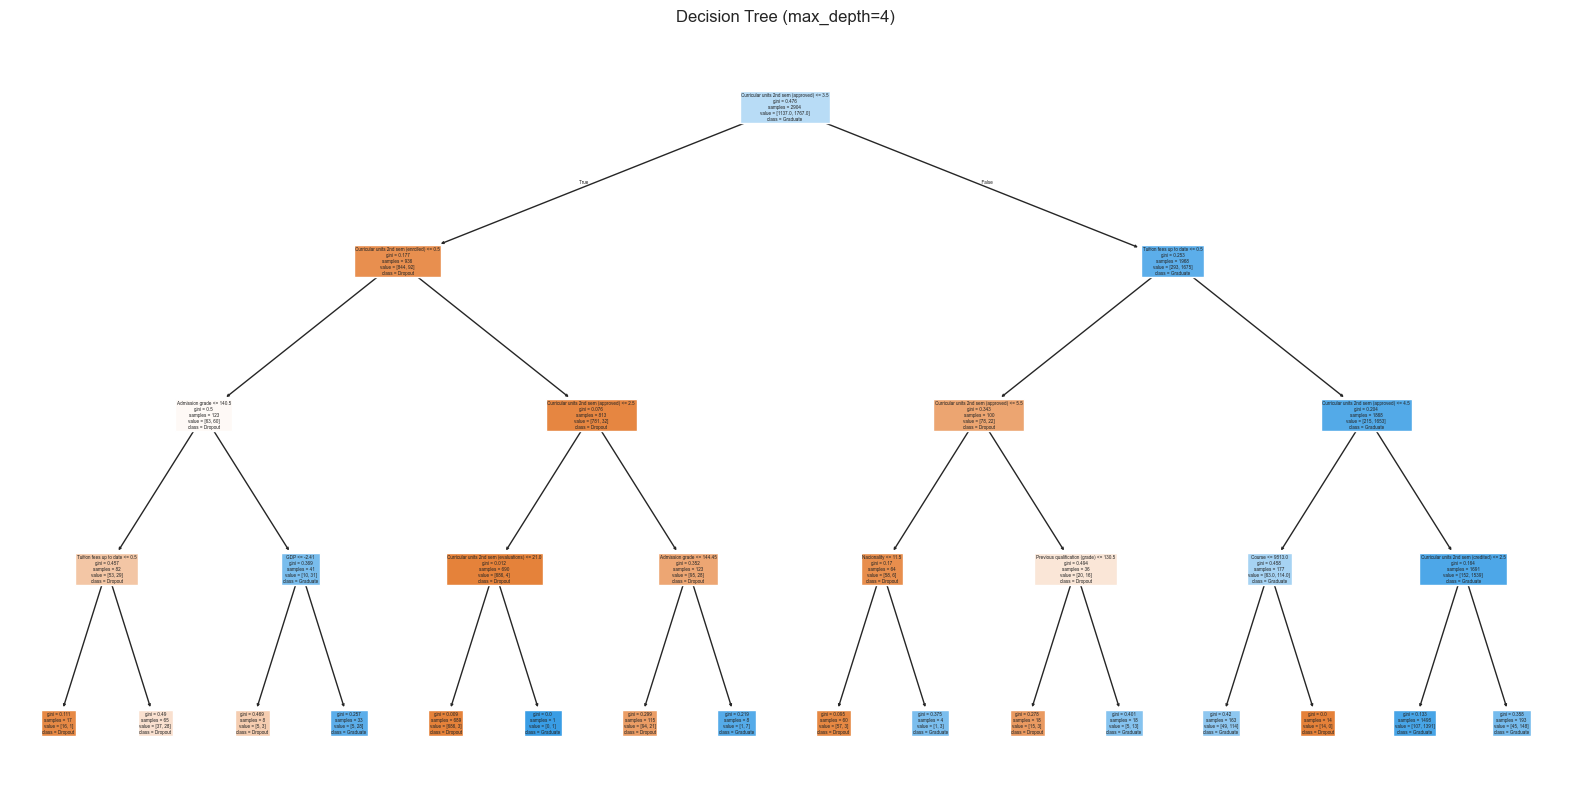

In [25]:
tree_clf = decision_tree_classifier(X_train, y_train, X_test, y_test, max_depth=4, random_state=42)

**Results and Interpretability - Depth 4**

Accuracy: 0.88 — almost unchanged from depth 3, showing the model has reached a performance plateau.

Class-wise performance:

- Dropout: F1 = 0.84 (Precision = 0.91, Recall = 0.78)

- Graduate: F1 = 0.91 (Recall = 0.95)

**Interpretability**:

The additional layer introduces slightly more detail but increases complexity.

Core predictors remain the same: Curricular units approved/enrolled (2nd sem), Tuition fees up to date, and Previous qualification grade.

A few secondary variables appear (e.g., Admission grade, Age), refining boundary cases but making the tree less immediately readable.

**Conclusion**:

Depth 4 improves class balance marginally but offers limited performance gain for a noticeable loss in clarity. The tree remains understandable, yet depth 3 provides a cleaner, nearly equivalent alternative.

**Because it became so hard to intepret the decision tree graphically, we can confirm the conclusions stated above by  exporting the  if–then rules of the DT using export_text() to see exactly how the model decides which students are likely to graduate or drop out.**, and confirm the conclusions above.

In [26]:
from sklearn.tree import export_text
print(export_text(tree_clf, feature_names=list(X_train.columns), max_depth=4))


|--- Curricular units 2nd sem (approved) <= 3.50
|   |--- Curricular units 2nd sem (enrolled) <= 0.50
|   |   |--- Admission grade <= 140.50
|   |   |   |--- Tuition fees up to date <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Tuition fees up to date >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Admission grade >  140.50
|   |   |   |--- GDP <= -2.41
|   |   |   |   |--- class: 0
|   |   |   |--- GDP >  -2.41
|   |   |   |   |--- class: 1
|   |--- Curricular units 2nd sem (enrolled) >  0.50
|   |   |--- Curricular units 2nd sem (approved) <= 2.50
|   |   |   |--- Curricular units 2nd sem (evaluations) <= 21.00
|   |   |   |   |--- class: 0
|   |   |   |--- Curricular units 2nd sem (evaluations) >  21.00
|   |   |   |   |--- class: 1
|   |   |--- Curricular units 2nd sem (approved) >  2.50
|   |   |   |--- Admission grade <= 144.45
|   |   |   |   |--- class: 0
|   |   |   |--- Admission grade >  144.45
|   |   |   |   |--- class: 1
|--- Curricular units 2nd sem (approved

<a id="explainable-boosting-machine"></a>
#### **Explainable Boosting Machine**


While the Decision Tree provided clear, rule-based explanations and solid accuracy, it still has limitations:

- It captures only hierarchical, piecewise-linear relationships — each split is a hard boundary.
- Increasing tree depth improves accuracy but reduces interpretability.
- Some variables (like socioeconomic factors or academic grades) may interact in non-linear or additive ways that a simple tree can’t model effectively.

To address this, we now move to an Explainable Boosting Machine (EBM) — a glass-box model that:

- Extends linear models by learning smooth, non-linear feature effects,
- Automatically captures pairwise interactions when relevant,


**The Decision Tree explains how decisions are made step-by-step. The EBM explains why each feature contributes to the prediction — giving a smoother, more generalizable view of the same problem.**

In [27]:
ebm = explainable_boosting_classifier(X_train, y_train, X_test, y_test)


Accuracy: 0.9090909090909091
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       284
           1       0.90      0.96      0.93       442

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



In [28]:
# Global explanation: shows each feature’s contribution strength
ebm_global = ebm.explain_global()
show(ebm_global)


<!-- http://127.0.0.1:7149/4731340704/ -->

<a id="post-modelling-explanations"></a>
### **Post-Modelling Explanations**

<a id="black-box-training"></a>
#### **Black Box Model Training**

In [29]:
from utils.post_modelling_utils import *

XGBoost ..... why?

In [30]:
train_xgb_pipeline(X_train, X_test, y_train, y_test)


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       284
           1       0.89      0.97      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726


=== Confusion Matrix ===
[[232  52]
 [ 13 429]]

Artifacts saved to folder: src/xgb_model


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['logloss', 'auc'],
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, ...)

<a id="references"></a>
### **References**


<a id="ref-dataset"></a>
[1] UCI Machine Learning Repository. *Dropout and Academic Success Dataset*.  
https://archive.ics.uci.edu/dataset/697/dropout+and+academic+success
